## Cleaning section

Cleaning the Country data

In [3]:
import pandas as pd


 Loading the  scrapped data

In [4]:

df = pd.read_csv('country.csv')
print(f"Original Data has shape: {df.shape}")
df.head()

#load_data('country.csv')



Original Data has shape: (235, 13)


,Unnamed: 0,#,Country,Population,Yearly Change,Net Change,Density,Land Area,Net Migrants,Fert. Rate,Med. Age,Urban Population,World Share
0,0,1,China,"1,439,323,776",0.39%,"5,540,090",153,"9,388,211","-348,399",1.7,38,61%,18.47%
1,1,2,India,"1,380,004,385",0.99%,"13,586,631",464,"2,973,190","-532,687",2.2,28,35%,17.70%
2,2,3,United States,"331,002,651",0.59%,"1,937,734",36,"9,147,420","954,806",1.8,38,83%,4.25%
3,3,4,Indonesia,"273,523,615",1.07%,"2,898,047",151,"1,811,570","-98,955",2.3,30,56%,3.51%
4,4,5,Pakistan,"220,892,340",2.00%,"4,327,022",287,"770,880","-233,379",3.6,23,35%,2.83%


 Cleaning population per country


In [5]:
df.get('Density ')

0        153
1        464
2         36
3        151
4        287
       ...  
230       50
231        0
232        6
233      136
234    2,003
Name: Density , Length: 235, dtype: object

In [6]:
df= df.rename(columns={'Density ': "Density",' Net Migrants':'Net Migrants'})
used_cols = ['Country','Population','Yearly Change','Density','Net Migrants','Urban Population','World Share']
df = df[used_cols]
df.head(10)


,Country,Population,Yearly Change,Density,Net Migrants,Urban Population,World Share
0,China,"1,439,323,776",0.39%,153,"-348,399",61%,18.47%
1,India,"1,380,004,385",0.99%,464,"-532,687",35%,17.70%
2,United States,"331,002,651",0.59%,36,"954,806",83%,4.25%
3,Indonesia,"273,523,615",1.07%,151,"-98,955",56%,3.51%
4,Pakistan,"220,892,340",2.00%,287,"-233,379",35%,2.83%
5,Brazil,"212,559,417",0.72%,25,"21,200",88%,2.73%
6,Nigeria,"206,139,589",2.58%,226,"-60,000",52%,2.64%
7,Bangladesh,"164,689,383",1.01%,"1,265","-369,501",39%,2.11%
8,Russia,"145,934,462",0.04%,9,"182,456",74%,1.87%
9,Mexico,"128,932,753",1.06%,66,"-60,000",84%,1.65%


 Checking nan value in all coloumns

In [7]:
df.isna().sum()

Country             0
Population          0
Yearly Change       0
Density             0
Net Migrants        0
Urban Population    0
World Share         0
dtype: int64

Filling nan values with 0

In [8]:
df['Urban Population'] = df['Urban Population'].replace('N.A','0')
#df.isna().sum()

Yearly Change, Urban Population and World Share have x% in their  values but we only need numeric values for visualisation so removing their '%' sign in values and converting them to float from string

In [9]:
df['Yearly Change'] = list(map(lambda x: x[:-1], df['Yearly Change'].values))
df['Urban Population'] = list(map(lambda x: x[:-1], df['Urban Population'].values))
df['World Share'] = list(map(lambda x: x[:-1], df['World Share'].values))

In [ ]:
df['Yearly Change'] = [float(x) for x in df['Yearly Change'].values]
df['Urban Population'] = [float(x) for x in df['Urban Population'].values]
df['World Share'] = [float(x) for x in df['World Share'].values]

In [ ]:
df.head(10)

,Country,Population,Yearly Change,Density,Net Migrants,Urban Population,World Share
0,China,"1,439,323,776",0.39,153,"-348,399",61.0,18.47
1,India,"1,380,004,385",0.99,464,"-532,687",35.0,17.70
2,United States,"331,002,651",0.59,36,"954,806",83.0,4.25
3,Indonesia,"273,523,615",1.07,151,"-98,955",56.0,3.51
4,Pakistan,"220,892,340",2.00,287,"-233,379",35.0,2.83
5,Brazil,"212,559,417",0.72,25,"21,200",88.0,2.73
6,Nigeria,"206,139,589",2.58,226,"-60,000",52.0,2.64
7,Bangladesh,"164,689,383",1.01,"1,265","-369,501",39.0,2.11
8,Russia,"145,934,462",0.04,9,"182,456",74.0,1.87
9,Mexico,"128,932,753",1.06,66,"-60,000",84.0,1.65


In [ ]:
df.to_csv('country_cleaned.csv')

Cleaning Population by year


In [ ]:
df = pd.read_csv('pop_by_year.csv')
print(f"Original Data has shape: {df.shape}")
df.head()

Original Data has shape: (94, 6)


,Unnamed: 0,Year,World Population,YearlyChange,NetChange,Density(P/Km²)
0,0,2020,"7,794,798,739",1.05 %,"81,330,639",52
1,1,2019,"7,713,468,100",1.08 %,"82,377,060",52
2,2,2018,"7,631,091,040",1.10 %,"83,232,115",51
3,3,2017,"7,547,858,925",1.12 %,"83,836,876",51
4,4,2016,"7,464,022,049",1.14 %,"84,224,910",50


Keeping only used columns in our data

In [ ]:
#df= df.drop(['NetChange'],axis=1)
df= df.rename(columns={'Density(P/Km²)': "Density"})
used_cols = ['Year','World Population','YearlyChange','Density']
df = df[used_cols]
df.head(10)


,Year,World Population,YearlyChange,Density
0,2020,"7,794,798,739",1.05 %,52
1,2019,"7,713,468,100",1.08 %,52
2,2018,"7,631,091,040",1.10 %,51
3,2017,"7,547,858,925",1.12 %,51
4,2016,"7,464,022,049",1.14 %,50
5,2015,"7,379,797,139",1.16 %,50
6,2014,"7,295,290,765",1.17 %,49
7,2013,"7,210,581,976",1.19 %,48
8,2012,"7,125,828,059",1.20 %,48
9,2011,"7,041,194,301",1.21 %,47


Removing % from YearlyChange and converting to float 

In [ ]:
df['YearlyChange'] = list(map(lambda x: x[:-1], df['YearlyChange'].values))
df.head()

,Year,World Population,YearlyChange,Density
0,2020,"7,794,798,739",1.05,52
1,2019,"7,713,468,100",1.08,52
2,2018,"7,631,091,040",1.10,51
3,2017,"7,547,858,925",1.12,51
4,2016,"7,464,022,049",1.14,50


Taking the datas of last 50 years only

In [ ]:
df_new = df.head(70)

In [ ]:

df_new['YearlyChange'] = [float(x) for x in df_new['YearlyChange'].values]
df_new.head()

C:\Users\pandi\AppData\Local\Temp\ipykernel_11984\23566814.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['YearlyChange'] = [float(x) for x in df_new['YearlyChange'].values]


,Year,World Population,YearlyChange,Density
0,2020,"7,794,798,739",1.05,52
1,2019,"7,713,468,100",1.08,52
2,2018,"7,631,091,040",1.10,51
3,2017,"7,547,858,925",1.12,51
4,2016,"7,464,022,049",1.14,50


In [ ]:
df_new.to_csv('pop_by_year_cleaned.csv')

Cleaning the region data


In [ ]:
df = pd.read_csv('region.csv')
print(f"Original Data has shape: {df.shape}")
df.head()

Original Data has shape: (6, 13)


,Unnamed: 0,#,Region,Population (2020),Yearly Change,Net Change,Density (P/Km²),Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,0,1,Asia,"4,641,054,775",0.86 %,"39,683,577",150,"31,033,131","-1,729,112",2.151942,32,0 %,59.5 %
1,1,2,Africa,"1,340,598,147",2.49 %,"32,533,952",45,"29,648,481","-463,024",4.438375,20,0 %,17.2 %
2,2,3,Europe,"747,636,026",0.06 %,"453,275",34,"22,134,900","1,361,011",1.609646,43,0 %,9.6 %
3,3,4,Latin America and the Caribbean,"653,962,331",0.9 %,"5,841,374",32,"20,139,378","-521,499",2.044660,31,0 %,8.4 %
4,4,5,Northern America,"368,869,647",0.62 %,"2,268,683",20,"18,651,660","1,196,400",1.752689,39,0 %,4.7 %


Renaming the coloumns name

In [ ]:
df = df.rename(columns={"Population (2020)":"Population","Density (P/Km²)":"Density","Migrants (net)":"Net Migrants"})
df.head()

,Unnamed: 0,#,Region,Population,Yearly Change,Net Change,Density,Area (Km²),Net Migrants,Fert. Rate,Med. Age,Urban Pop %,World Share
0,0,1,Asia,"4,641,054,775",0.86 %,"39,683,577",150,"31,033,131","-1,729,112",2.151942,32,0 %,59.5 %
1,1,2,Africa,"1,340,598,147",2.49 %,"32,533,952",45,"29,648,481","-463,024",4.438375,20,0 %,17.2 %
2,2,3,Europe,"747,636,026",0.06 %,"453,275",34,"22,134,900","1,361,011",1.609646,43,0 %,9.6 %
3,3,4,Latin America and the Caribbean,"653,962,331",0.9 %,"5,841,374",32,"20,139,378","-521,499",2.044660,31,0 %,8.4 %
4,4,5,Northern America,"368,869,647",0.62 %,"2,268,683",20,"18,651,660","1,196,400",1.752689,39,0 %,4.7 %


Keeping only used coloumns


In [ ]:
used_cols = ['Region','Population','Yearly Change','Density','Net Migrants','World Share']
df = df[used_cols]
df.head(10)


,Region,Population,Yearly Change,Density,Net Migrants,World Share
0,Asia,"4,641,054,775",0.86 %,150,"-1,729,112",59.5 %
1,Africa,"1,340,598,147",2.49 %,45,"-463,024",17.2 %
2,Europe,"747,636,026",0.06 %,34,"1,361,011",9.6 %
3,Latin America and the Caribbean,"653,962,331",0.9 %,32,"-521,499",8.4 %
4,Northern America,"368,869,647",0.62 %,20,"1,196,400",4.7 %
5,Oceania,"42,677,813",1.31 %,5,"156,226",0.5 %


Removing the % sign in Yearly Change and World Share  and converting to float type.

In [ ]:
df['Yearly Change'] = list(map(lambda x: x[:-1], df['Yearly Change'].values))
df.head()

,Region,Population,Yearly Change,Density,Net Migrants,World Share
0,Asia,"4,641,054,775",0.86,150,"-1,729,112",59.5 %
1,Africa,"1,340,598,147",2.49,45,"-463,024",17.2 %
2,Europe,"747,636,026",0.06,34,"1,361,011",9.6 %
3,Latin America and the Caribbean,"653,962,331",0.9,32,"-521,499",8.4 %
4,Northern America,"368,869,647",0.62,20,"1,196,400",4.7 %


In [ ]:
df['World Share'] = list(map(lambda x: x[:-1], df['World Share'].values))
df.head()

,Region,Population,Yearly Change,Density,Net Migrants,World Share
0,Asia,"4,641,054,775",0.86,150,"-1,729,112",59.5
1,Africa,"1,340,598,147",2.49,45,"-463,024",17.2
2,Europe,"747,636,026",0.06,34,"1,361,011",9.6
3,Latin America and the Caribbean,"653,962,331",0.9,32,"-521,499",8.4
4,Northern America,"368,869,647",0.62,20,"1,196,400",4.7


In [ ]:
df['Yearly Change'] = [float(x) for x in df['Yearly Change'].values]

In [ ]:
df['World Share'] = [float(x) for x in df['World Share'].values]

In [ ]:
df.head()

,Region,Population,Yearly Change,Density,Net Migrants,World Share
0,Asia,"4,641,054,775",0.86,150,"-1,729,112",59.5
1,Africa,"1,340,598,147",2.49,45,"-463,024",17.2
2,Europe,"747,636,026",0.06,34,"1,361,011",9.6
3,Latin America and the Caribbean,"653,962,331",0.90,32,"-521,499",8.4
4,Northern America,"368,869,647",0.62,20,"1,196,400",4.7


Extacting the cleaned dataset

In [ ]:
df.to_csv('regions_cleaned.csv')

## Visualisation Part

Visualising the datas of each countries

In [11]:
df_cleaned = pd.read_csv('country_cleaned.csv')
df_cleaned.head(10)

,Country,Population,Yearly Change,Density,Net Migrants,Urban Population,World Share
0,China,"1,439,323,776",0.39,153,"-348,399",61.0,18.47
1,India,"1,380,004,385",0.99,464,"-532,687",35.0,17.70
2,United States,"331,002,651",0.59,36,"954,806",83.0,4.25
3,Indonesia,"273,523,615",1.07,151,"-98,955",56.0,3.51
4,Pakistan,"220,892,340",2.00,287,"-233,379",35.0,2.83
5,Brazil,"212,559,417",0.72,25,"21,200",88.0,2.73
6,Nigeria,"206,139,589",2.58,226,"-60,000",52.0,2.64
7,Bangladesh,"164,689,383",1.01,"1,265","-369,501",39.0,2.11
8,Russia,"145,934,462",0.04,9,"182,456",74.0,1.87
9,Mexico,"128,932,753",1.06,66,"-60,000",84.0,1.65


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
# Configuring styles
sns.set_style("darkgrid")
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = (20, 15)
plt.rcParams['figure.facecolor'] = '#00000000'

Plotting top 10 country with heighest and lowest population

In [ ]:

df_cleaned['Population'] =df_cleaned['Population'].str.replace(',', '').astype(float)

In [84]:
def large_small(var , col1, col2, title):
    if var == 1:
        top10 = df_cleaned.nlargest(10,col2)
    if var == 2:
        top10 = df_cleaned.nsmallest(10,col2)
    fig, ax = plt.subplots()
    ax.set_xticks(range(10))
    ax.set_xticklabels(top10[col1])
    ax = plt.bar(top10[col1], top10[col2],color=['lightblue','red','blue','green','black','purple','violet','cyan','darkgreen','pink'],alpha=0.5,edgecolor='black')
    fig.set_size_inches(30, 10)
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title(title)
    plt.show()

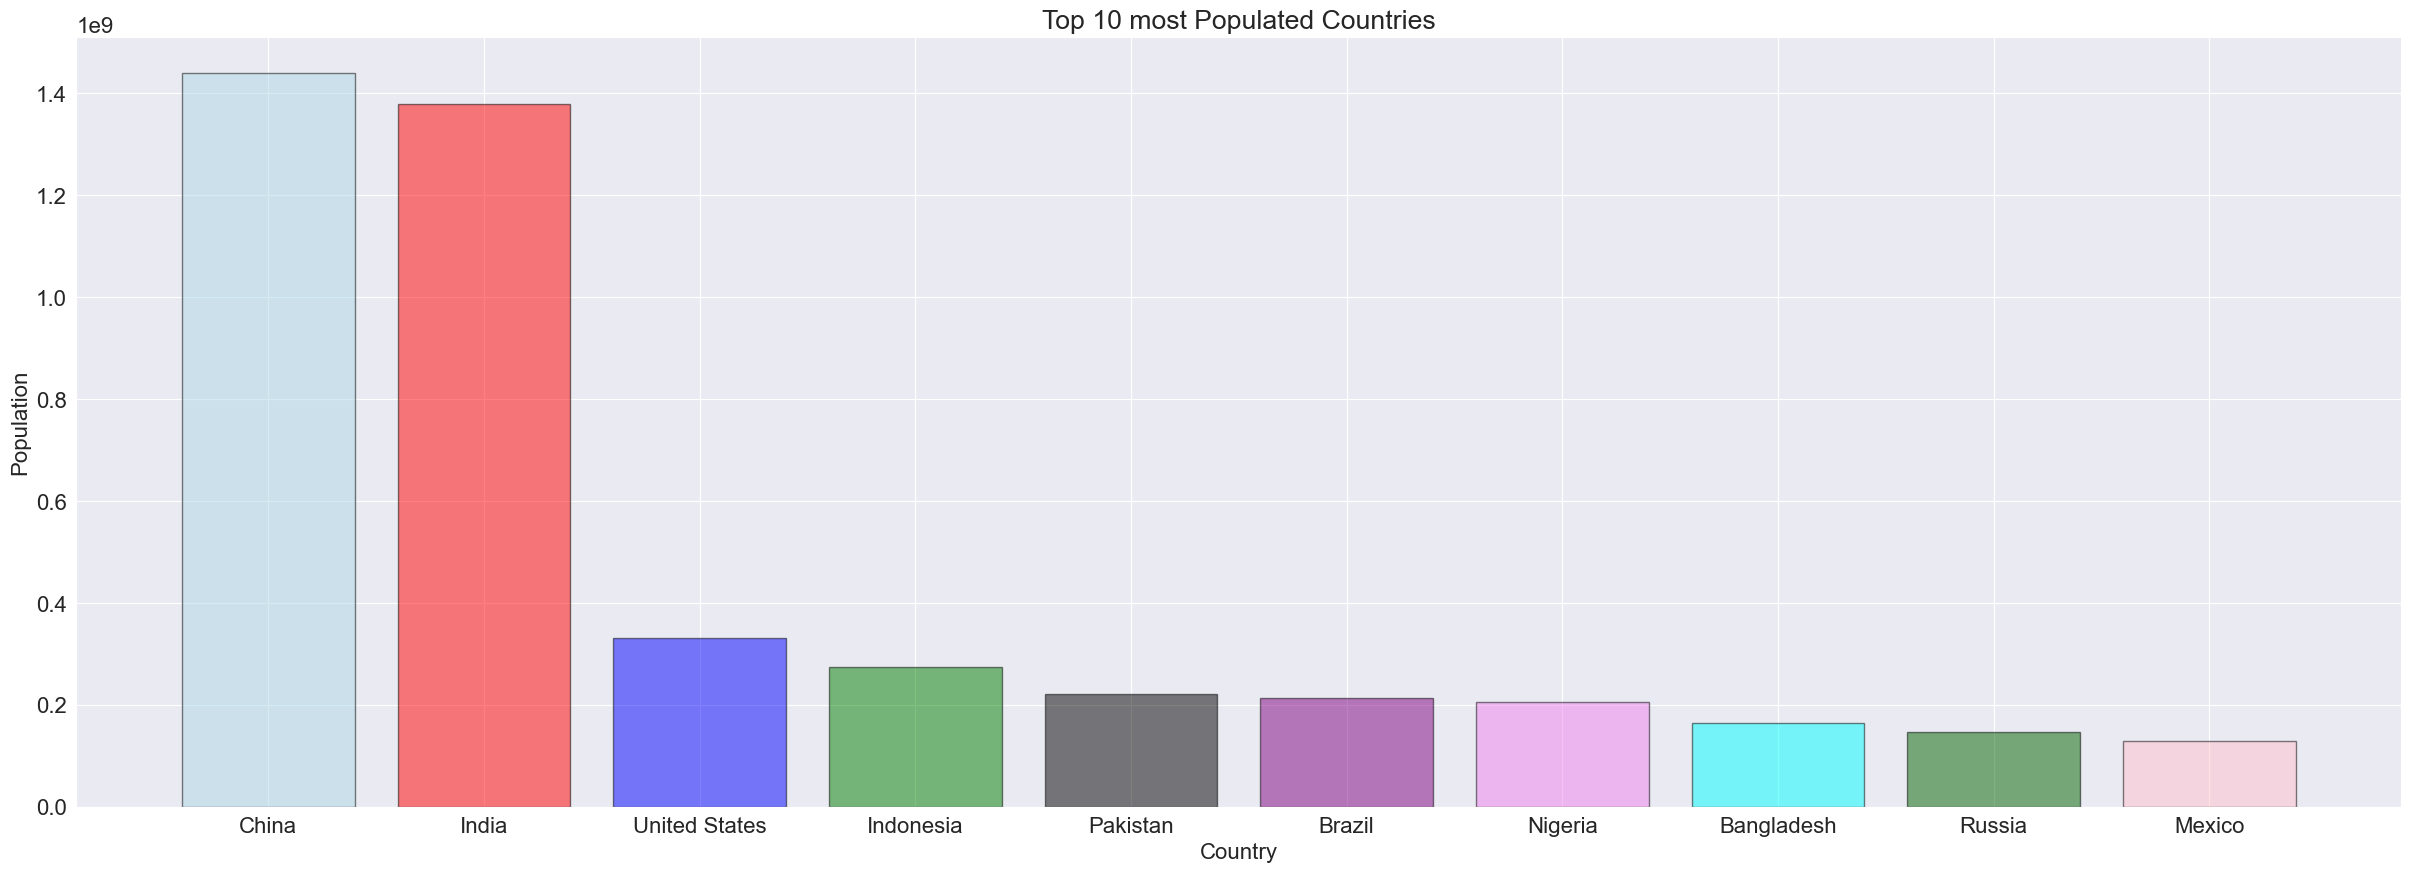

In [ ]:
large_small(1,'Country','Population','Top 10 Most Populated Countries')

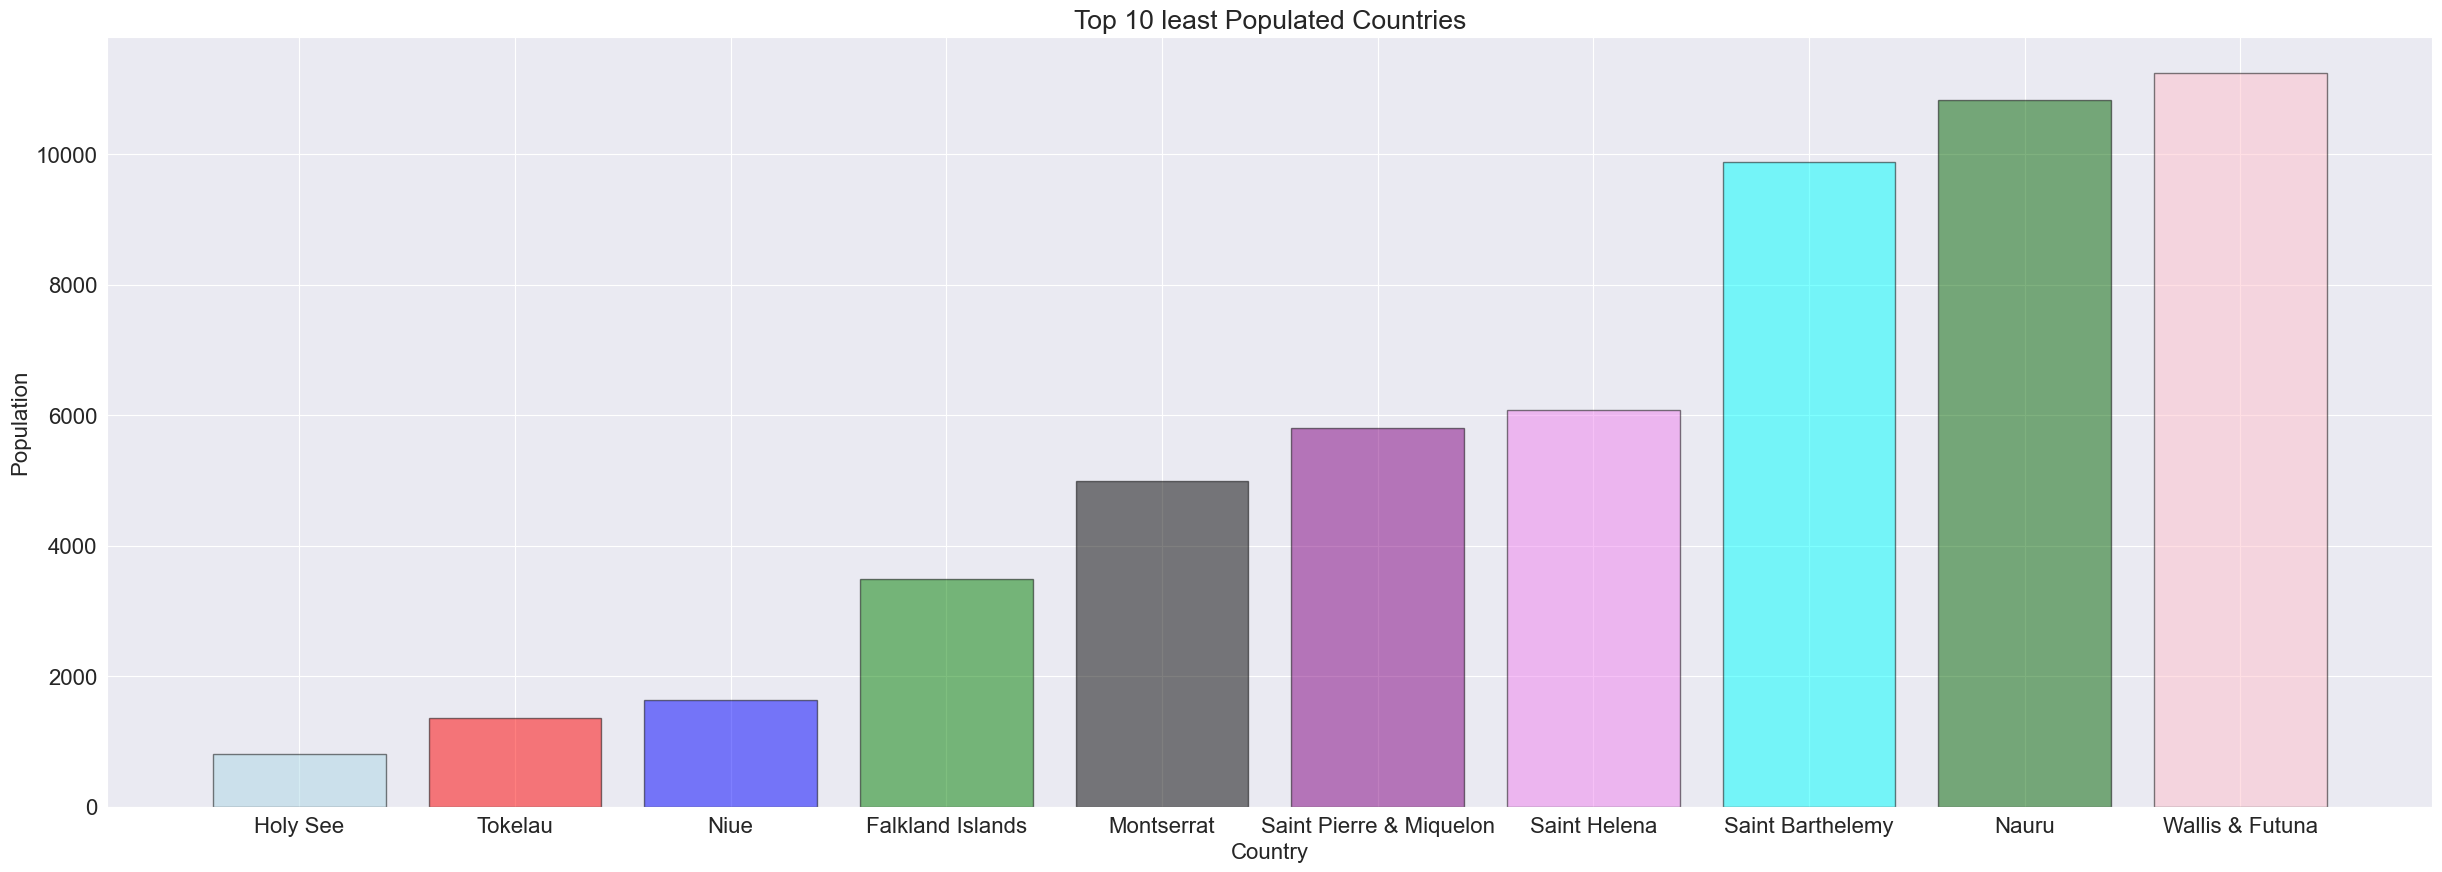

In [ ]:
large_small(2,'Country','Population','Top 10 least Populated Countries')

Plotting Countries with heighest and lowest population density 

In [ ]:
df_cleaned['Density'] =df_cleaned['Density'].str.replace(',', '').astype(float)

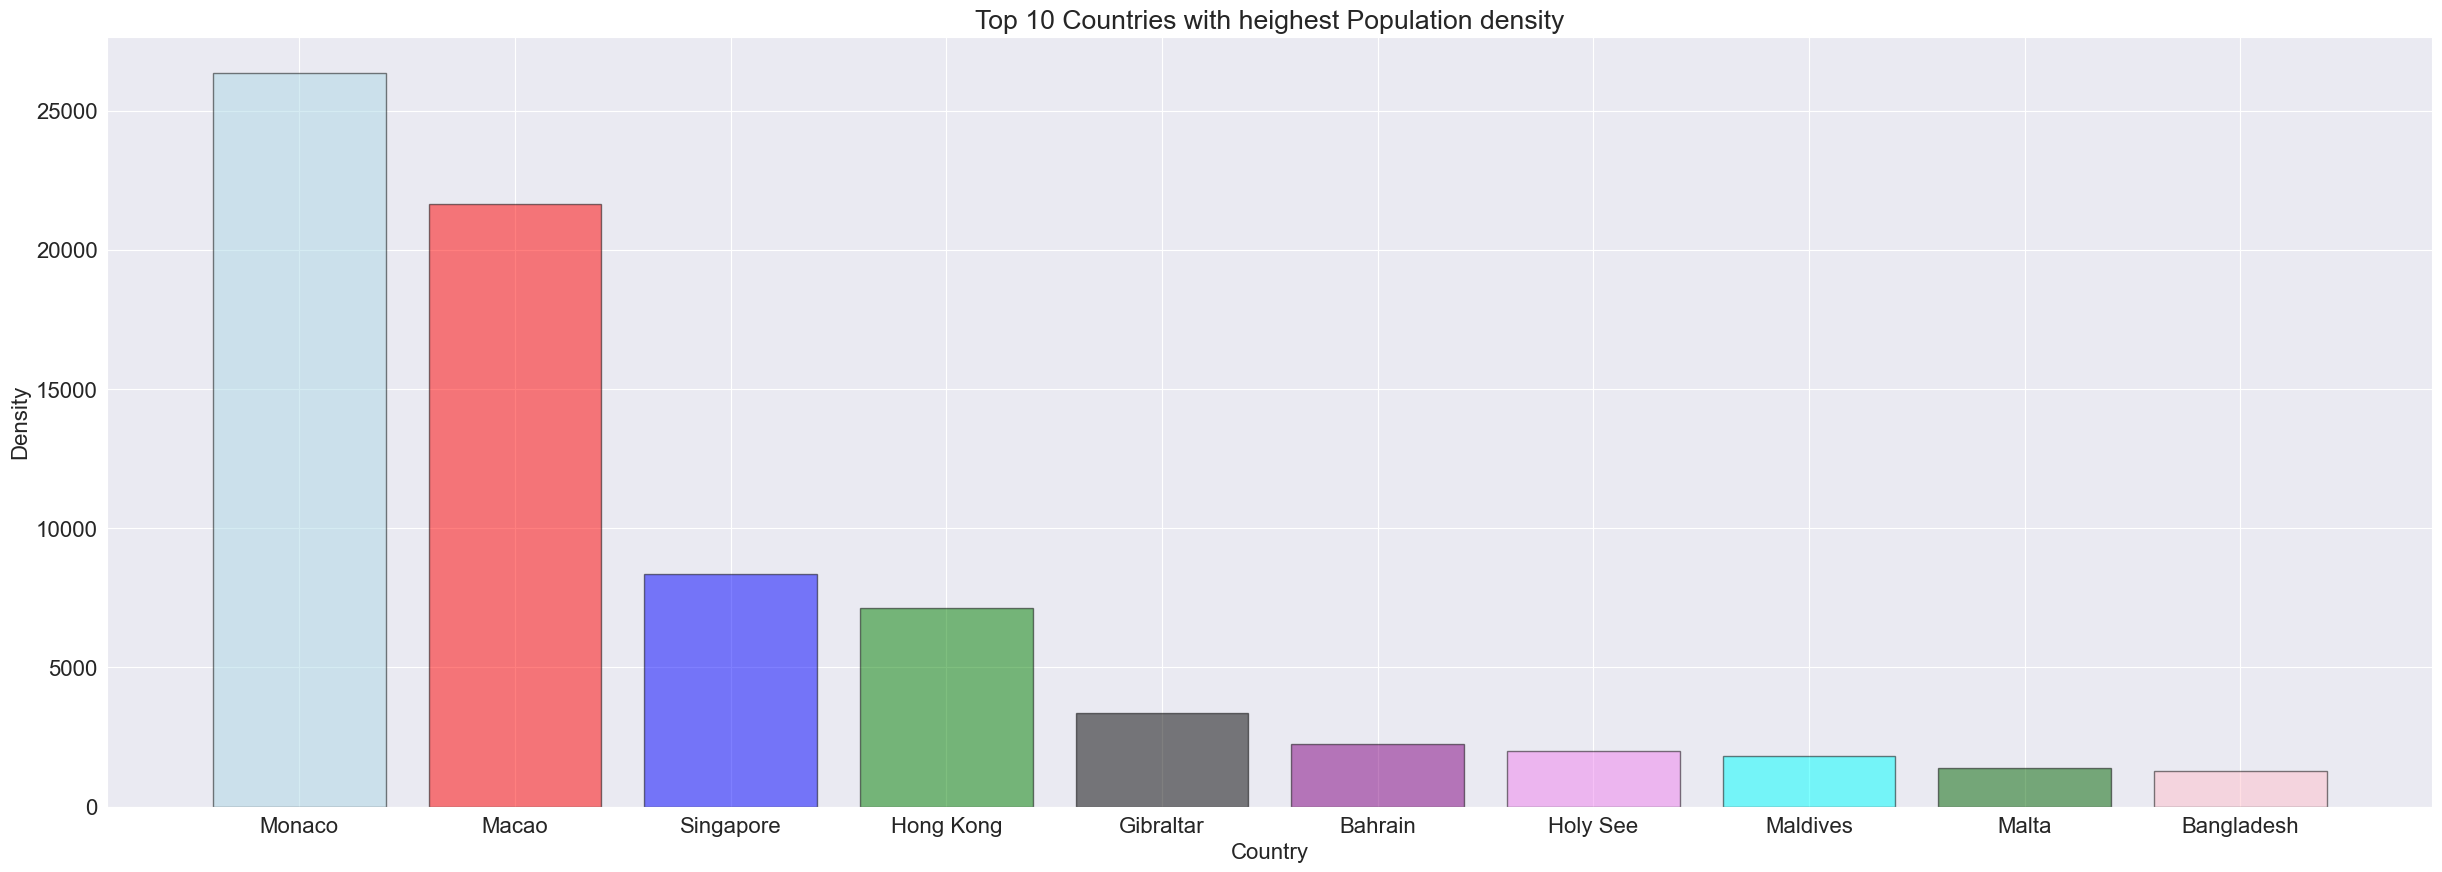

In [ ]:
large_small(1,'Country','Density','Top 10 Countries with heighest Population density')

We have Zeros as a values of density  so excluding all the zeros values before plotting countries with least density

In [ ]:
def small_without_zero(col1,col2,title):
    top10 = df_cleaned.loc[df_cleaned[col2] != 0, [col1, col2]].nsmallest(10,col2)
    fig, ax = plt.subplots()
    ax.set_xticks(range(10))
    ax.set_xticklabels(top10[col1])
    ax = plt.bar(top10[col1], top10[col2],color=['lightblue','red','blue','green','black','purple','violet','cyan','darkgreen','pink'],alpha=0.5,edgecolor='black')
    fig.set_size_inches(30, 10)
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title(title)
    plt.show()
    

In [ ]:
#top10 = df_cleaned.loc[df_cleaned['Country']:df_cleaned['Density'] != 0,'Country':'Density'].nsmallest(10)
# Filter rows with non-zero density and select 'Country' and 'Density' columns
filtered_df = df_cleaned.loc[df_cleaned['Density'] != 0, ['Country', 'Density']]
filtered_df.nsmallest(10,'Density')


,Country,Density
135,Mongolia,2.0
169,Western Sahara,2.0
54,Australia,3.0
142,Namibia,3.0
180,Iceland,3.0
38,Canada,4.0
107,Libya,4.0
144,Botswana,4.0
163,Guyana,4.0
170,Suriname,4.0


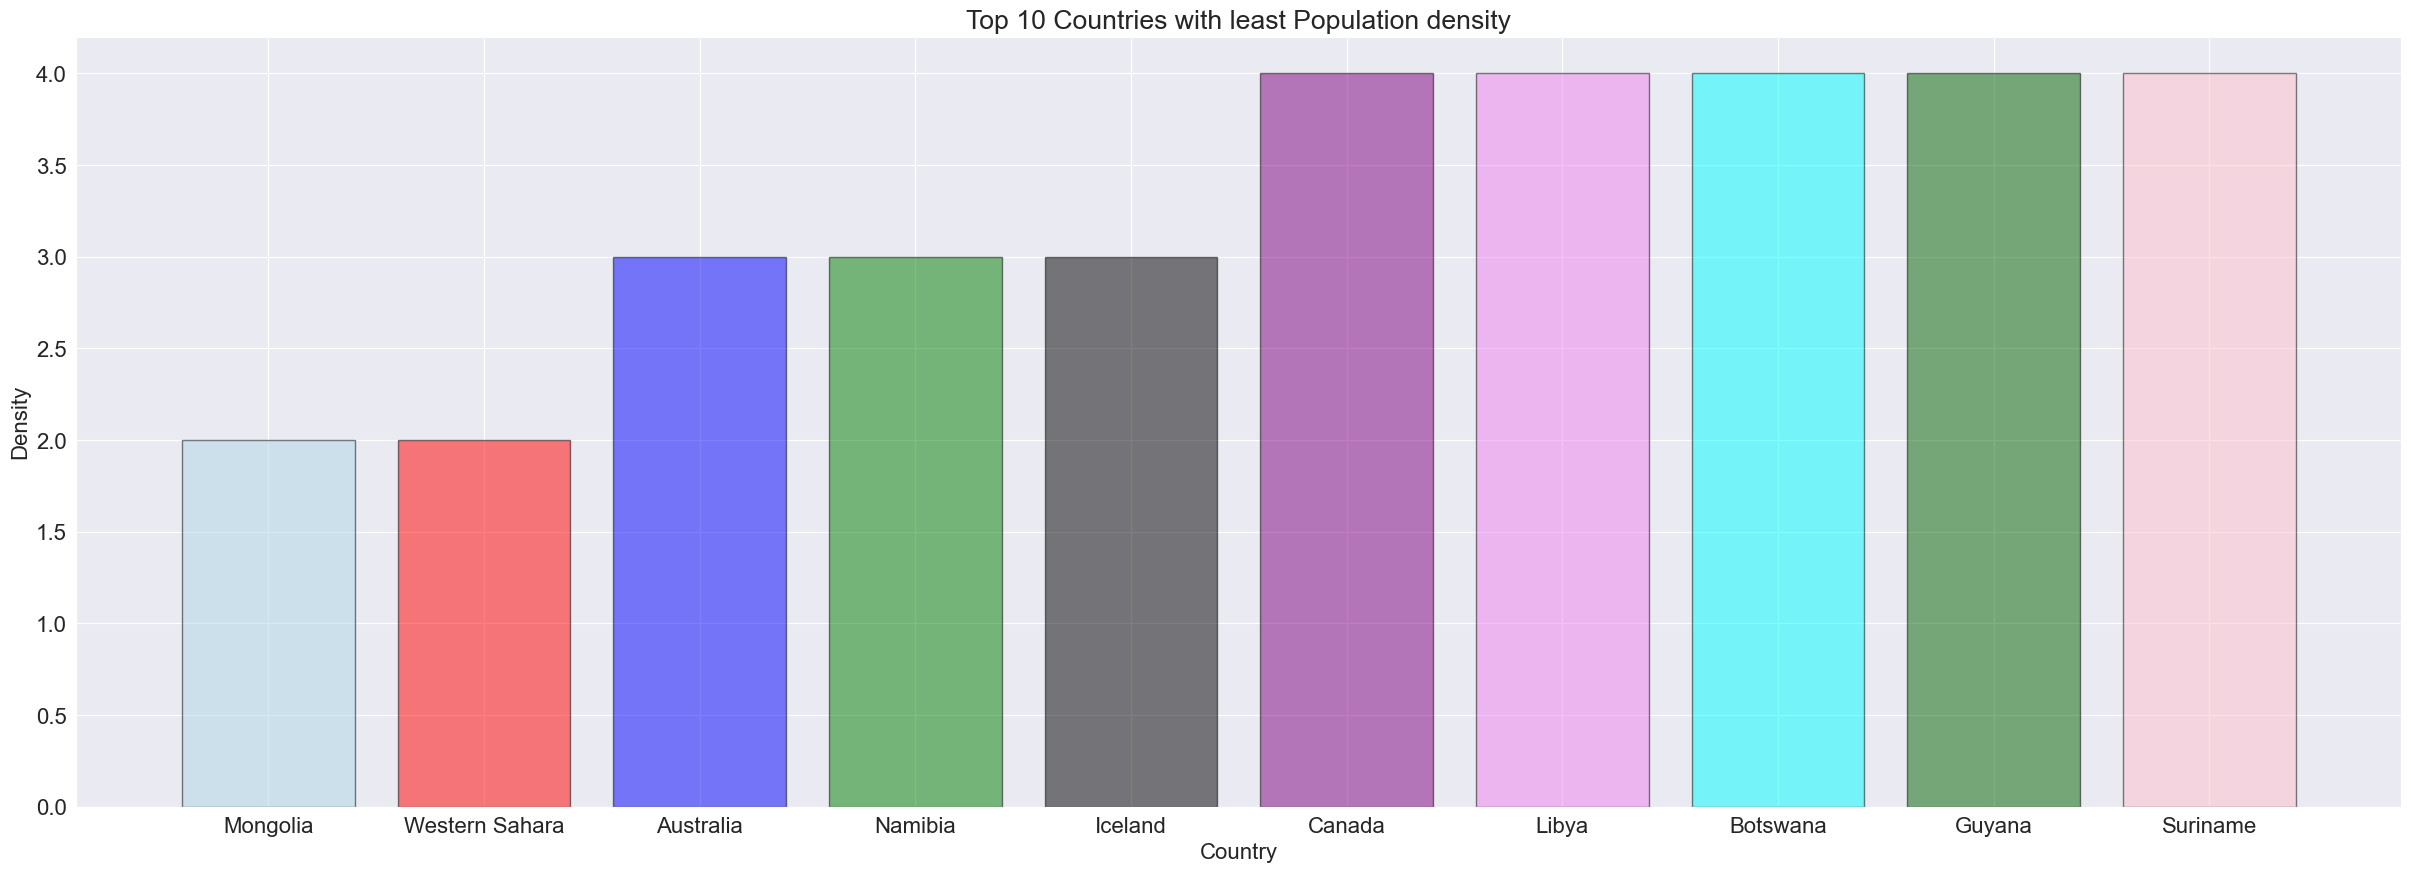

In [ ]:
small_without_zero('Country','Density','Top 10 Countries with least Population density')

Plotting countries facing highest number of emmigrants( people leaving countries)

In [ ]:
#df_cleaned['Net Migrants'] =df_cleaned['Net Migrants'].str.replace(',', '').astype(float)
df_cleaned['Net Migrants'] = df_cleaned['Net Migrants'].str.replace(',', '').str.replace(' ','0')
df_cleaned['Net Migrants'] = df_cleaned['Net Migrants'].astype(float)


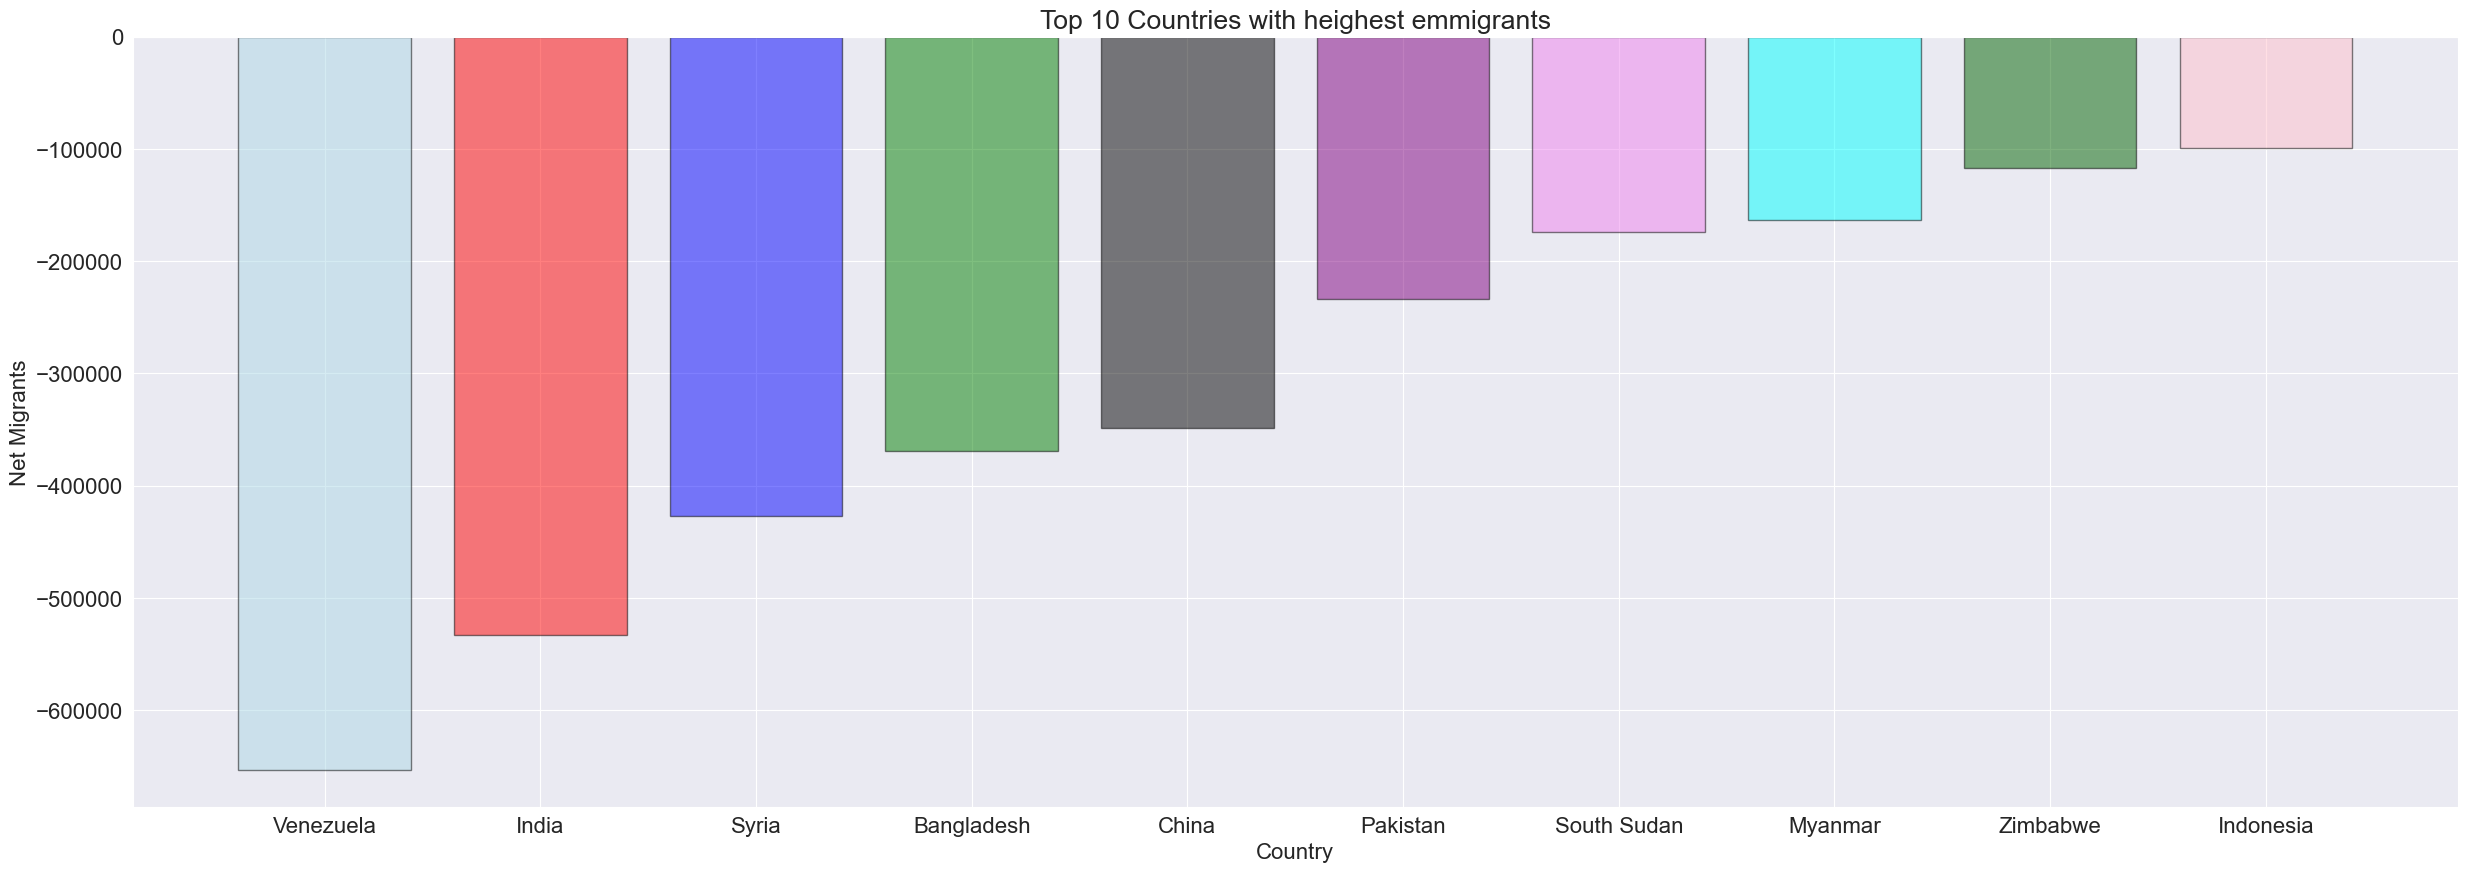

In [ ]:
small_without_zero('Country','Net Migrants','Top 10 Countries with heighest emmigrants')

Plot of countries population in urban areas with comparison with average population in urban areas

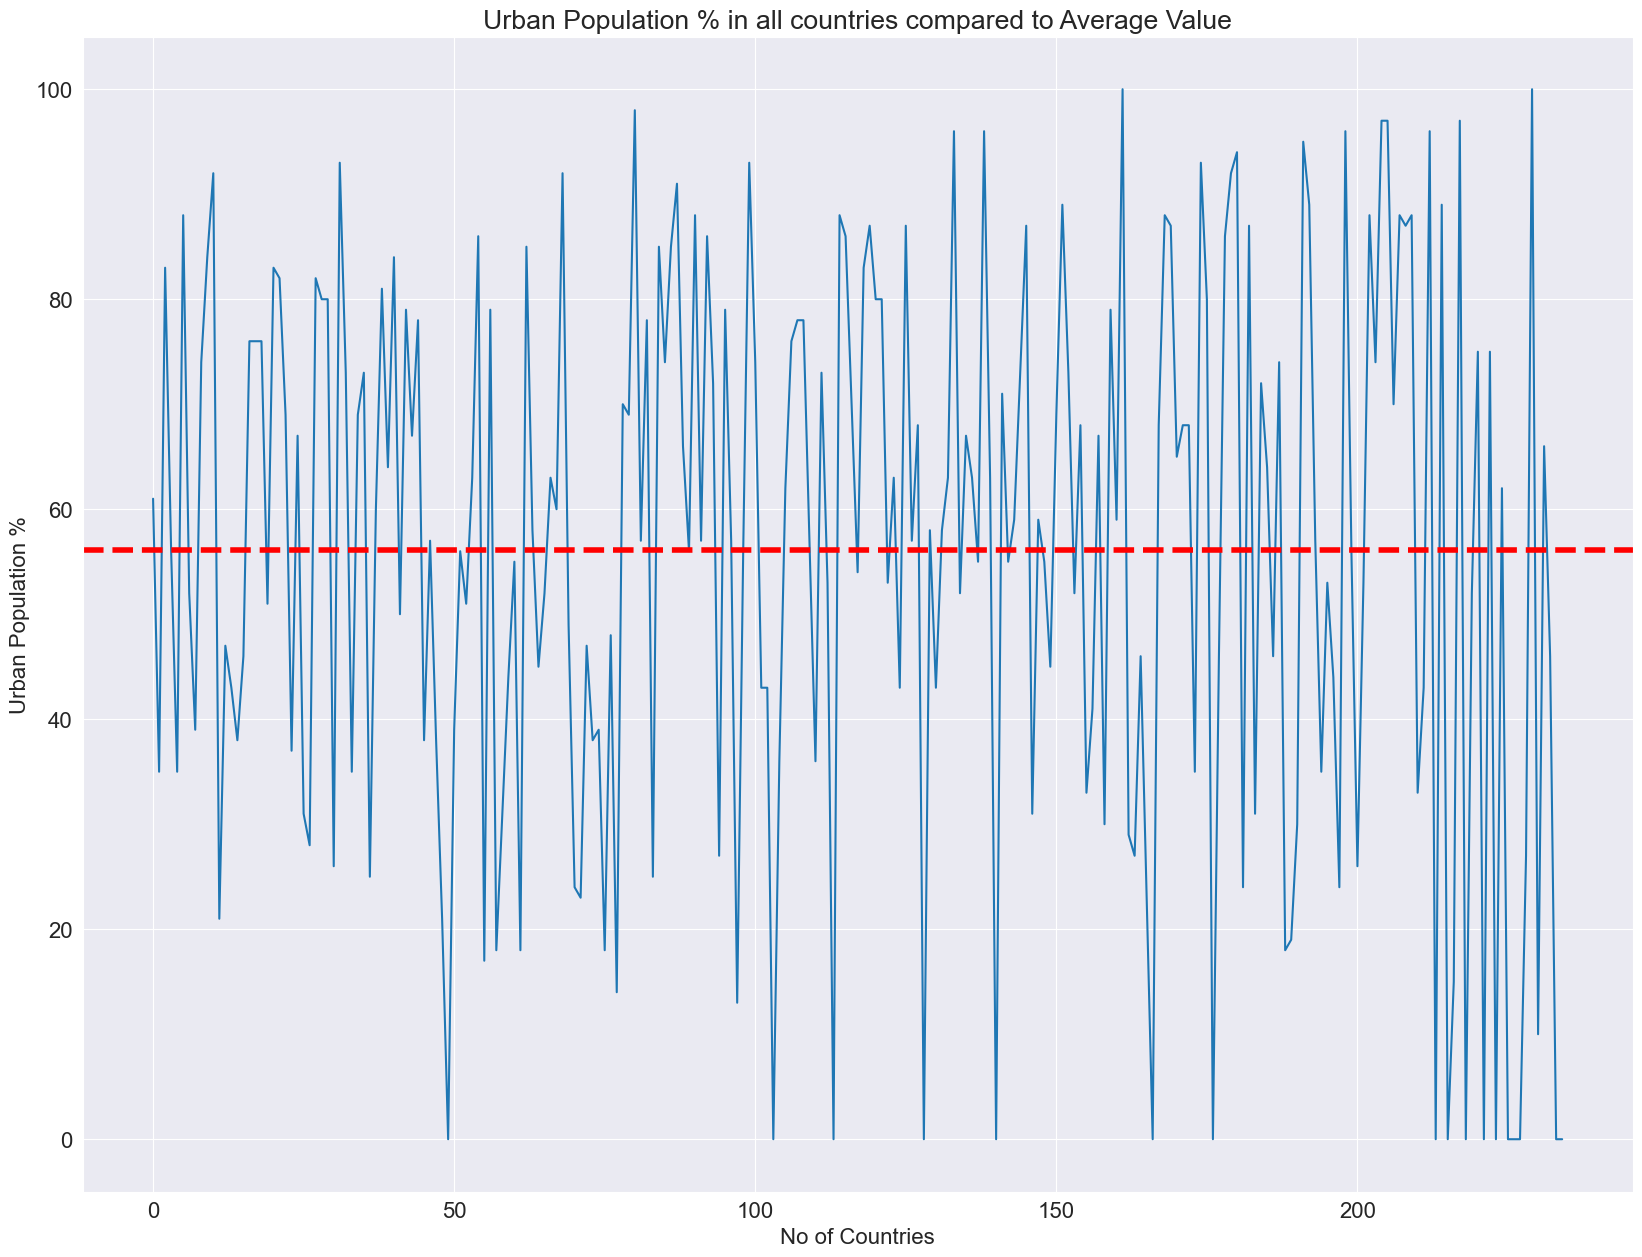

In [26]:

plt.plot(df_cleaned['Urban Population'])
plt.axhline(df_cleaned['Urban Population'].mean(), color='r', linestyle='dashed', linewidth=4,label='the mean')
plt.xlabel('No of Countries')
plt.ylabel('Urban Population %')
plt.title('Urban Population % in all countries compared to Average Value')
plt.show()

Contribution of each countries to world population

In [27]:
df_cleaned.head()


,Country,Population,Yearly Change,Density,Net Migrants,Urban Population,World Share
0,China,"1,439,323,776",0.39,153,"-348,399",61.0,18.47
1,India,"1,380,004,385",0.99,464,"-532,687",35.0,17.70
2,United States,"331,002,651",0.59,36,"954,806",83.0,4.25
3,Indonesia,"273,523,615",1.07,151,"-98,955",56.0,3.51
4,Pakistan,"220,892,340",2.00,287,"-233,379",35.0,2.83


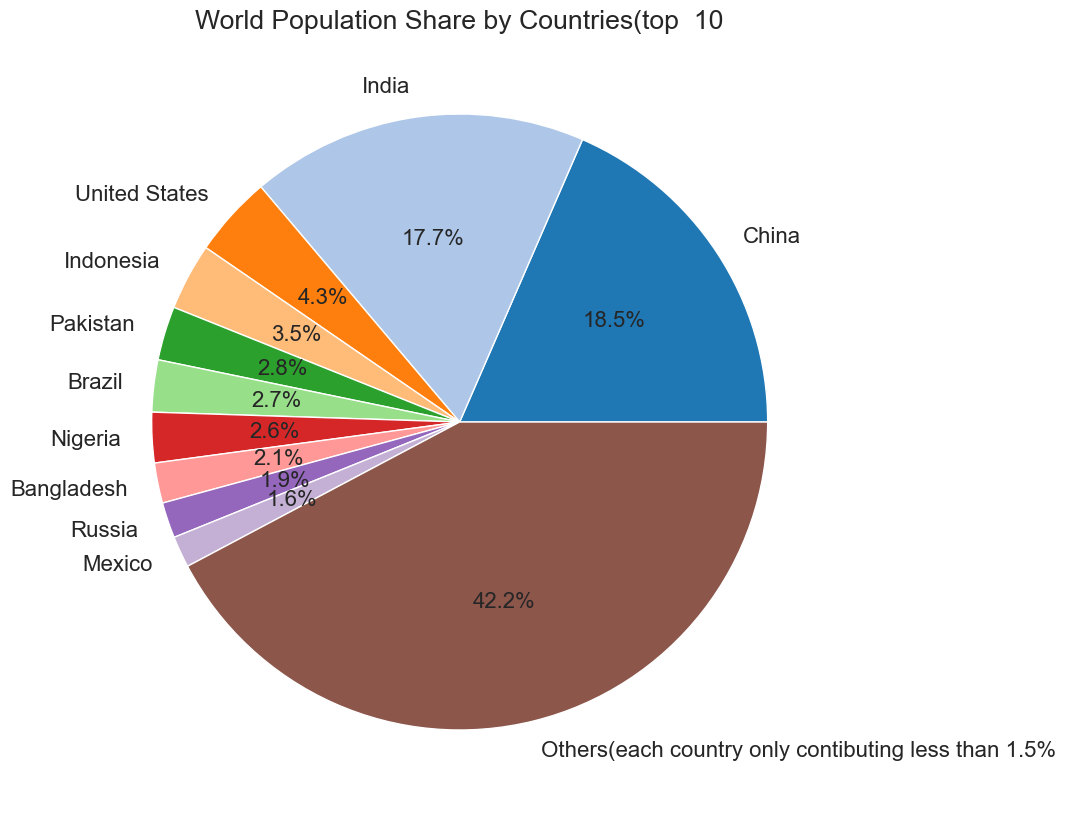

In [42]:
# Sort the DataFrame by population in descending order
df_sorted = df_cleaned.sort_values('World Share', ascending=False)
# Get the population shares for the top 8 countries
top_10 = df_sorted.head(10)
top_10_names = top_10['Country']
top_10_share = top_10['World Share']
# Calculate the share of other countries
other_share = 100 - top_10_share.sum()
# Prepare data for the pie chart
population_share = list(top_10_share) + [other_share]
country_names = list(top_10_names) + ['Others(each country only contibuting less than 1.5%']
# Plotting the pie chart
#palette_color = sns.color_palette('colorblind')
colors = plt.cm.tab20.colors[:11]

plt.figure(figsize=(10, 10))  # Adjust the figure size if needed
plt.pie(population_share, labels=country_names,colors=colors, autopct='%1.1f%%')
# Adding title
plt.title('World Population Share by Countries(top  10')
#plt.legend()
# Displaying the plot
plt.show()

Visualising the population data by regions

In [44]:
df_cleaned_r = pd.read_csv('regions_cleaned.csv')
df_cleaned_r.head()

,Unnamed: 0,Region,Population,Yearly Change,Density,Net Migrants,World Share
0,0,Asia,"4,641,054,775",0.86,150,"-1,729,112",59.5
1,1,Africa,"1,340,598,147",2.49,45,"-463,024",17.2
2,2,Europe,"747,636,026",0.06,34,"1,361,011",9.6
3,3,Latin America and the Caribbean,"653,962,331",0.90,32,"-521,499",8.4
4,4,Northern America,"368,869,647",0.62,20,"1,196,400",4.7


In [45]:
df_cleaned_r['Net Migrants'] = df_cleaned_r['Net Migrants'].str.replace(',', '').astype(float)
df_cleaned_r['Population'] = df_cleaned_r['Population'].str.replace(',', '').astype(float)

In [54]:
used_cols = ['Region','Population','Density','Net Migrants','World Share']
df_cleaned_r = df_cleaned_r[used_cols]
df_cleaned_r.head()


,Region,Population,Density,Net Migrants,World Share
0,Asia,4.641055e+09,150,-1729112.0,59.5
1,Africa,1.340598e+09,45,-463024.0,17.2
2,Europe,7.476360e+08,34,1361011.0,9.6
3,Latin America and the Caribbean,6.539623e+08,32,-521499.0,8.4
4,Northern America,3.688696e+08,20,1196400.0,4.7


Plotting histogram of population by regions

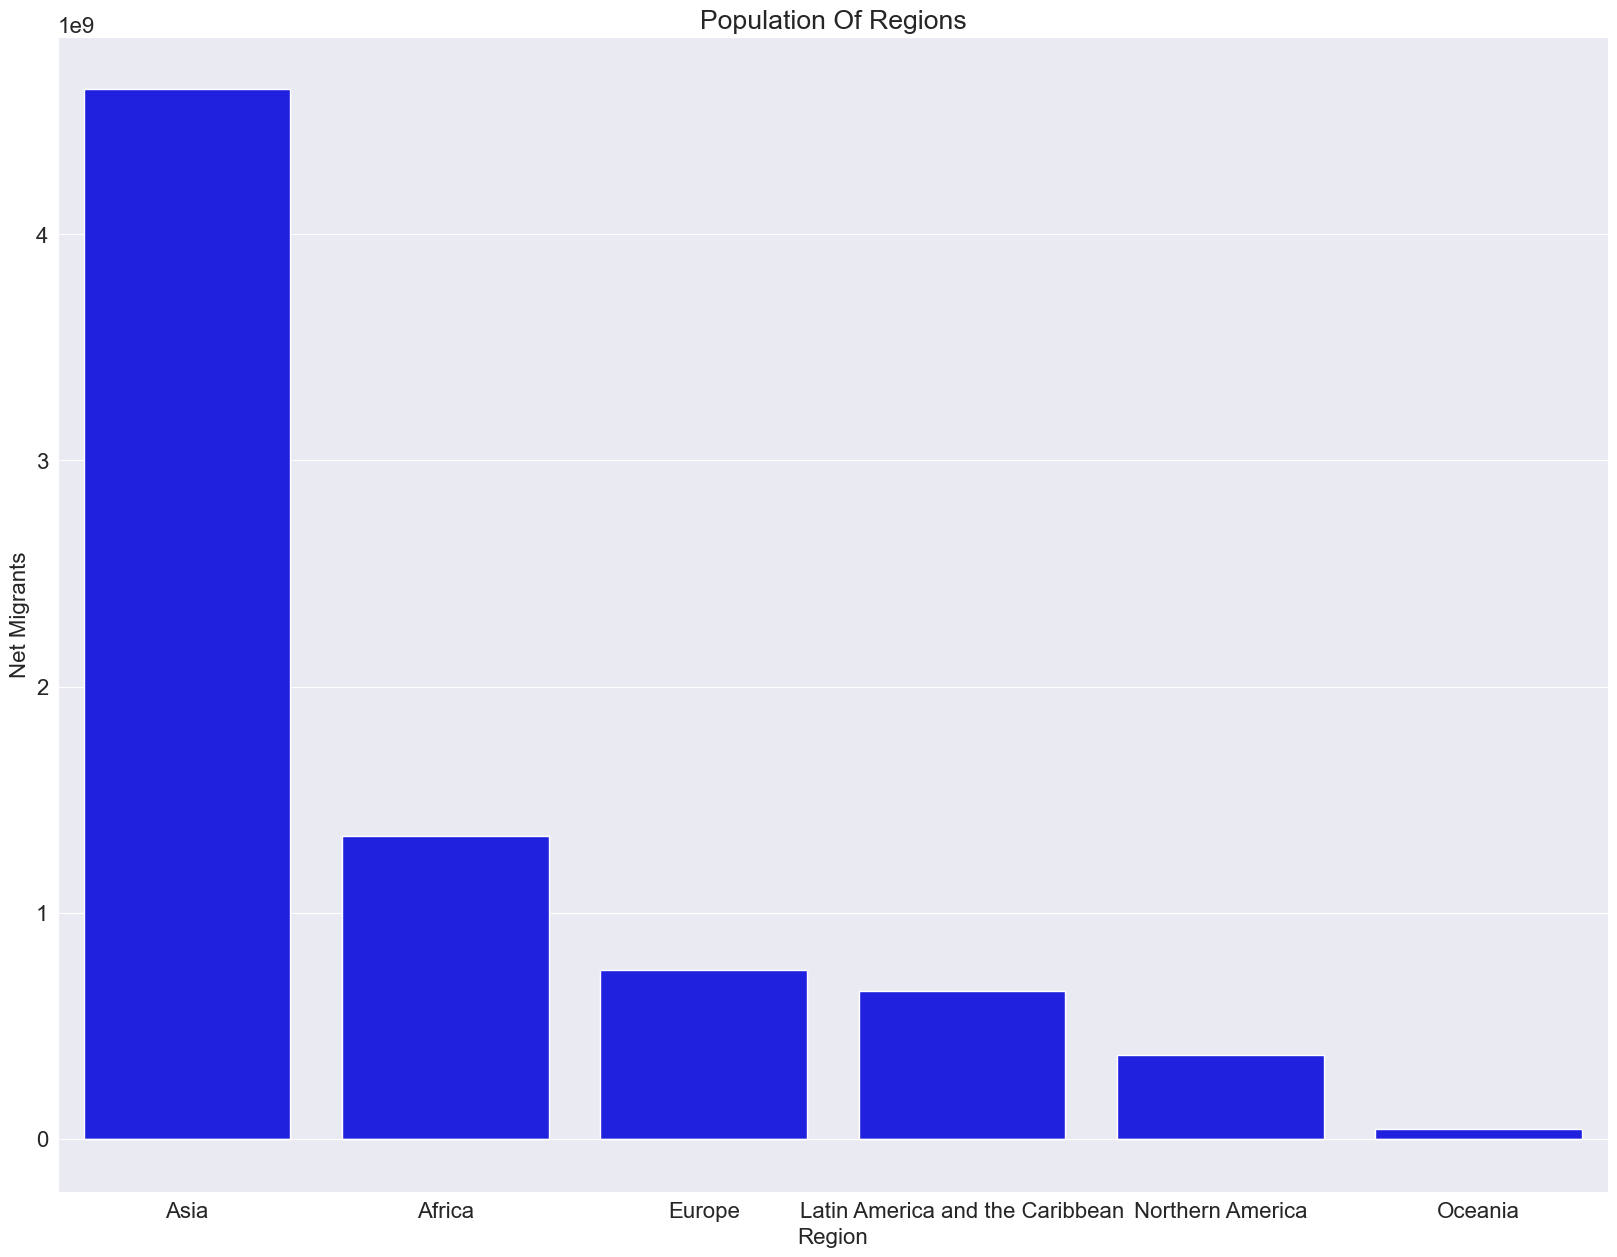

In [66]:
#sns.barplot(y=df_cleaned_r['Region'],x=df_cleaned_r['Population'],  color = 'red', orient='h')
#sns.barplot(y=df_cleaned_r['Region'],x=df_cleaned_r['Net Migrants'],color ='blue', orient='h')
sns.barplot(data=df_cleaned_r, x='Region', y='Population', color='blue', label='Population')
sns.barplot(data=df_cleaned_r, x='Region', y='Net Migrants', color='orange', label='Net Migration')

plt.title("Population Of Regions")
plt.show()

Plotting histogram showing the net migration of each region

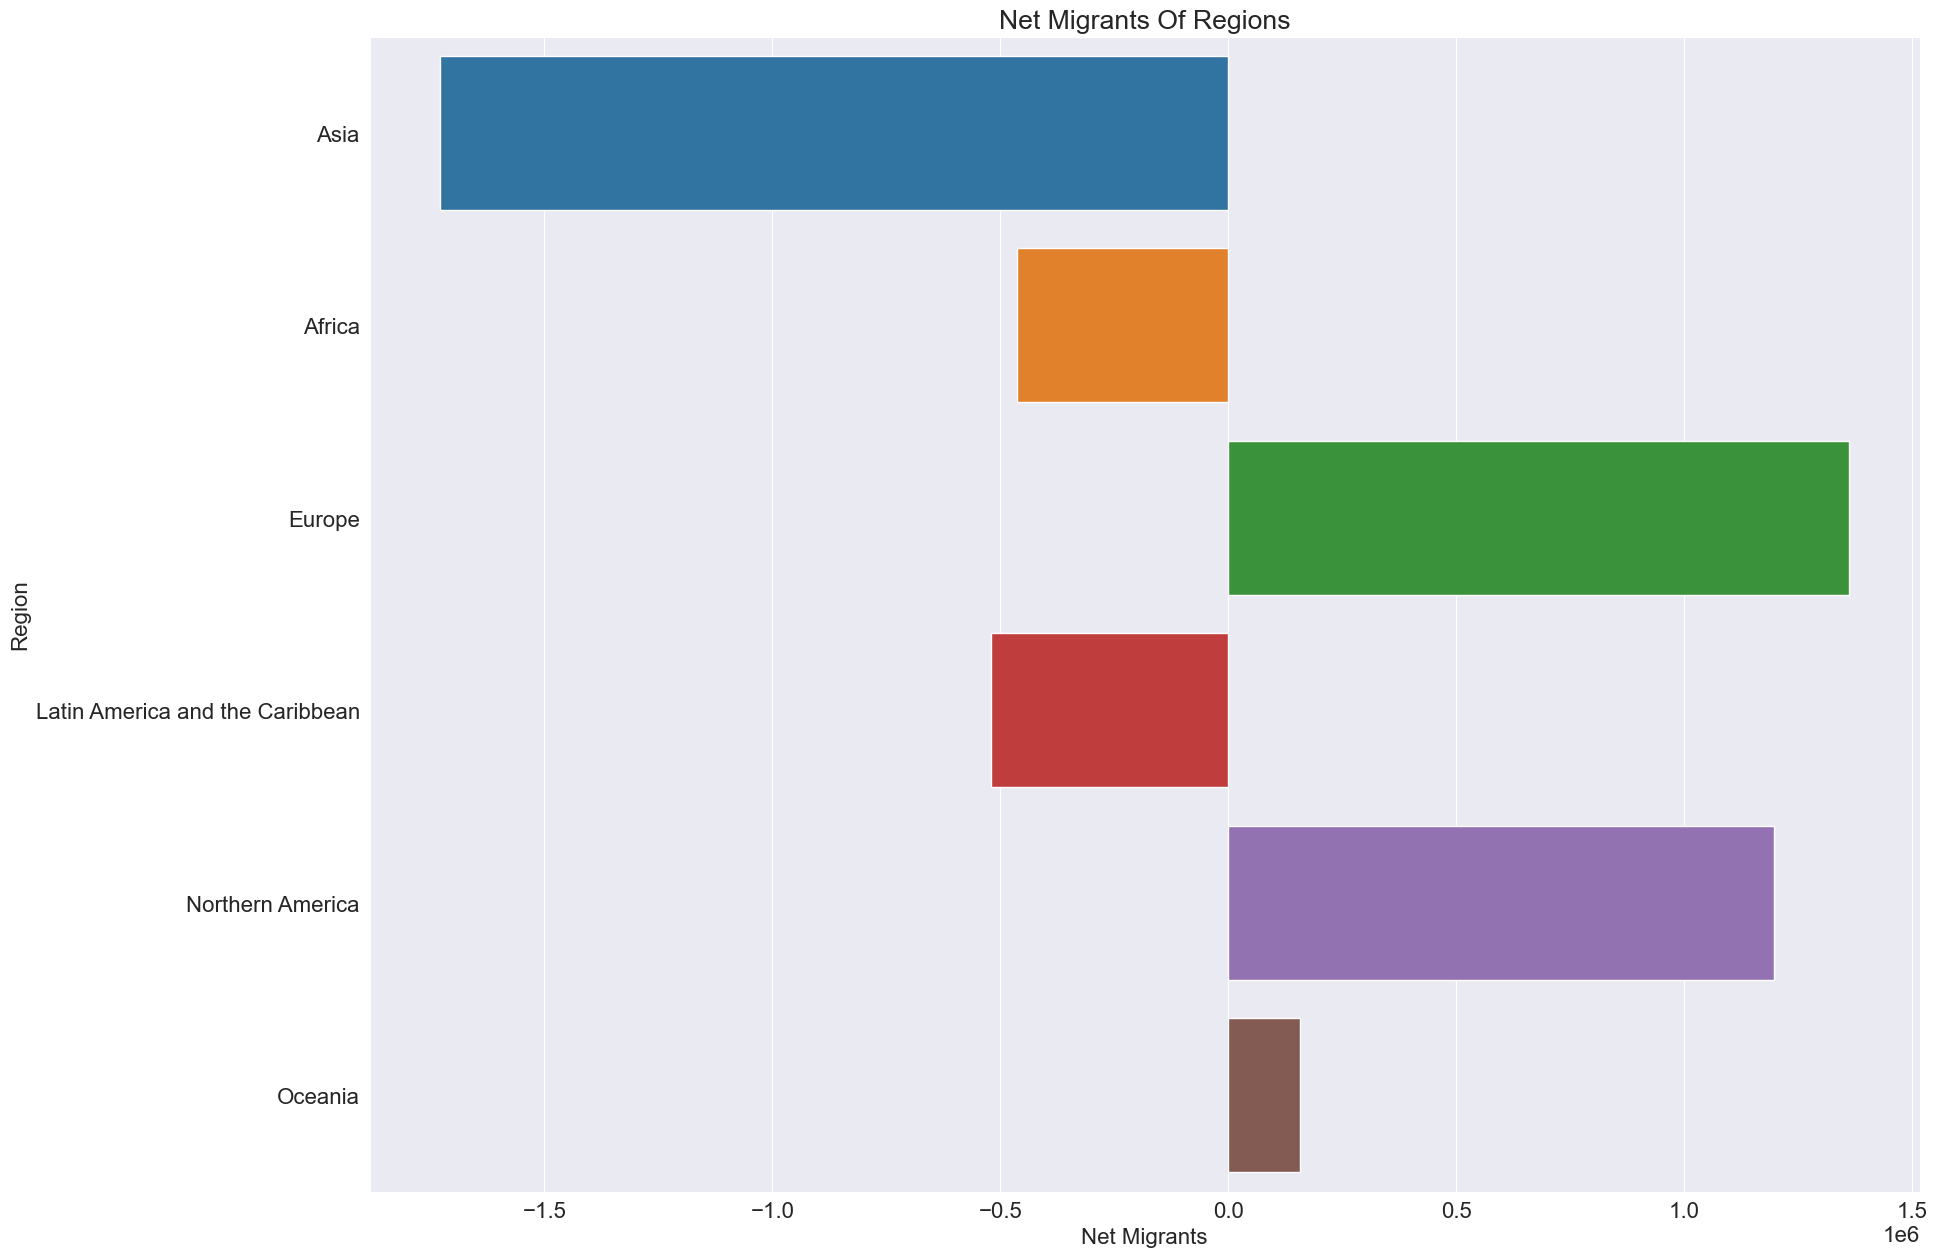

In [72]:
sns.barplot(y=df_cleaned_r['Region'],x=df_cleaned_r['Net Migrants'], orient='h')
plt.title("Net Migrants Of Regions")
plt.show()

Piechart showing the world share of population by each region

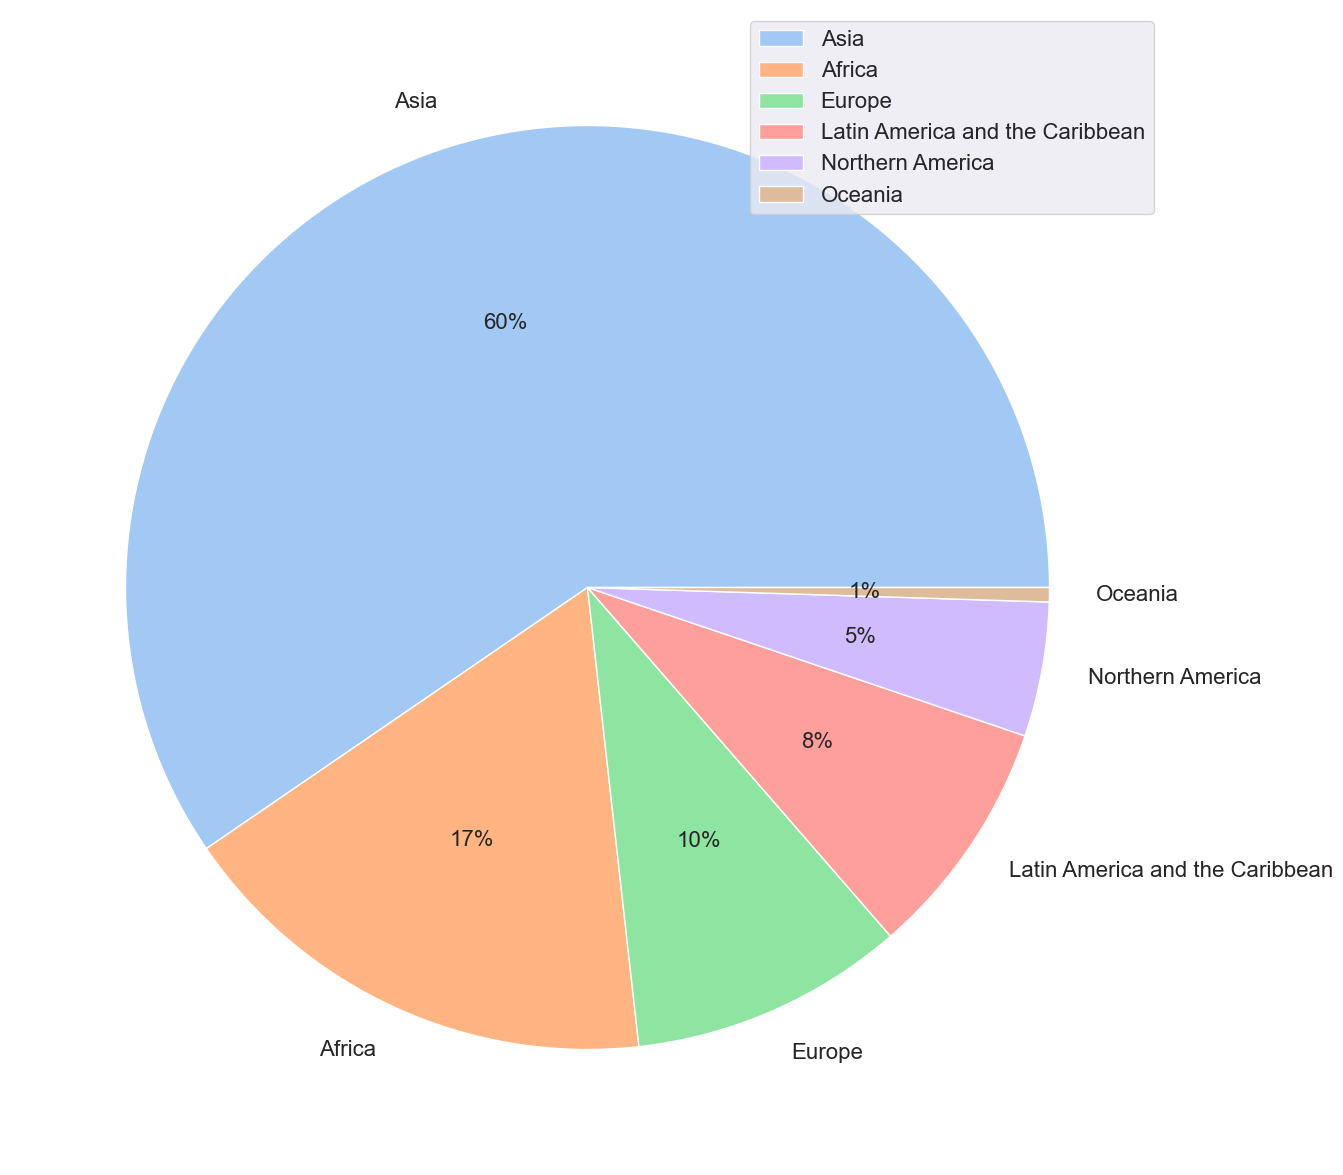

In [71]:
labels = df_cleaned_r['Region']
data = df_cleaned_r['World Share']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:6]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.legend()
plt.show()


Text(0, 0.5, 'Density')

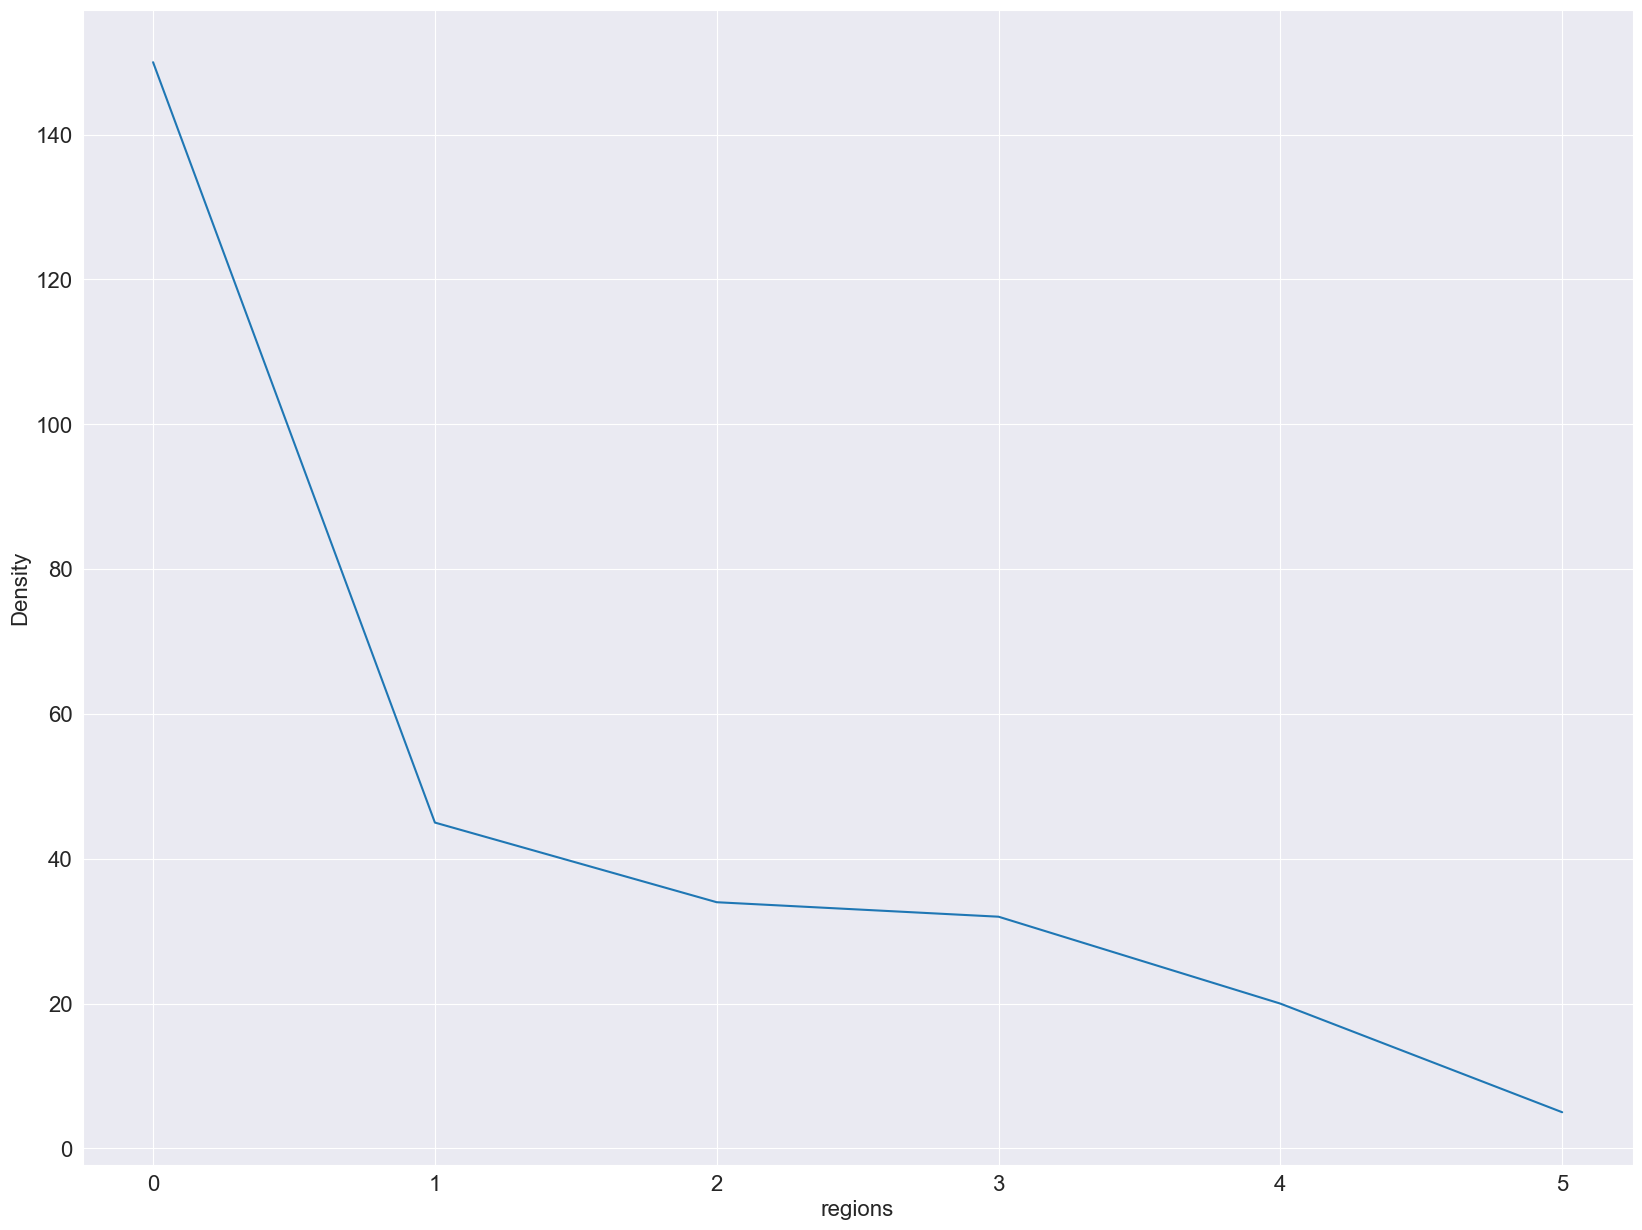

In [75]:
plt.plot(df_cleaned_r['Density'])
plt.xlabel('regions')
plt.ylabel('Density')

Visualising the population by year

In [77]:
df_cleaned_y = pd.read_csv('pop_by_year_cleaned.csv')
df_cleaned_y.head()

,Unnamed: 0,Year,World Population,YearlyChange,Density
0,0,2020,"7,794,798,739",1.05,52
1,1,2019,"7,713,468,100",1.08,52
2,2,2018,"7,631,091,040",1.10,51
3,3,2017,"7,547,858,925",1.12,51
4,4,2016,"7,464,022,049",1.14,50


In [78]:
df_cleaned_y['World Population']= df_cleaned_y['World Population'].str.replace(',','').astype(float)


In [80]:
df_cleaned_y.head()

,Unnamed: 0,Year,World Population,YearlyChange,Density
0,0,2020,7.794799e+09,1.05,52
1,1,2019,7.713468e+09,1.08,52
2,2,2018,7.631091e+09,1.10,51
3,3,2017,7.547859e+09,1.12,51
4,4,2016,7.464022e+09,1.14,50


Plotting Graphs showing the world population over diffrent year

In [100]:
df_cleaned_y['Year']= df_cleaned_y['Year'].astype(int) 

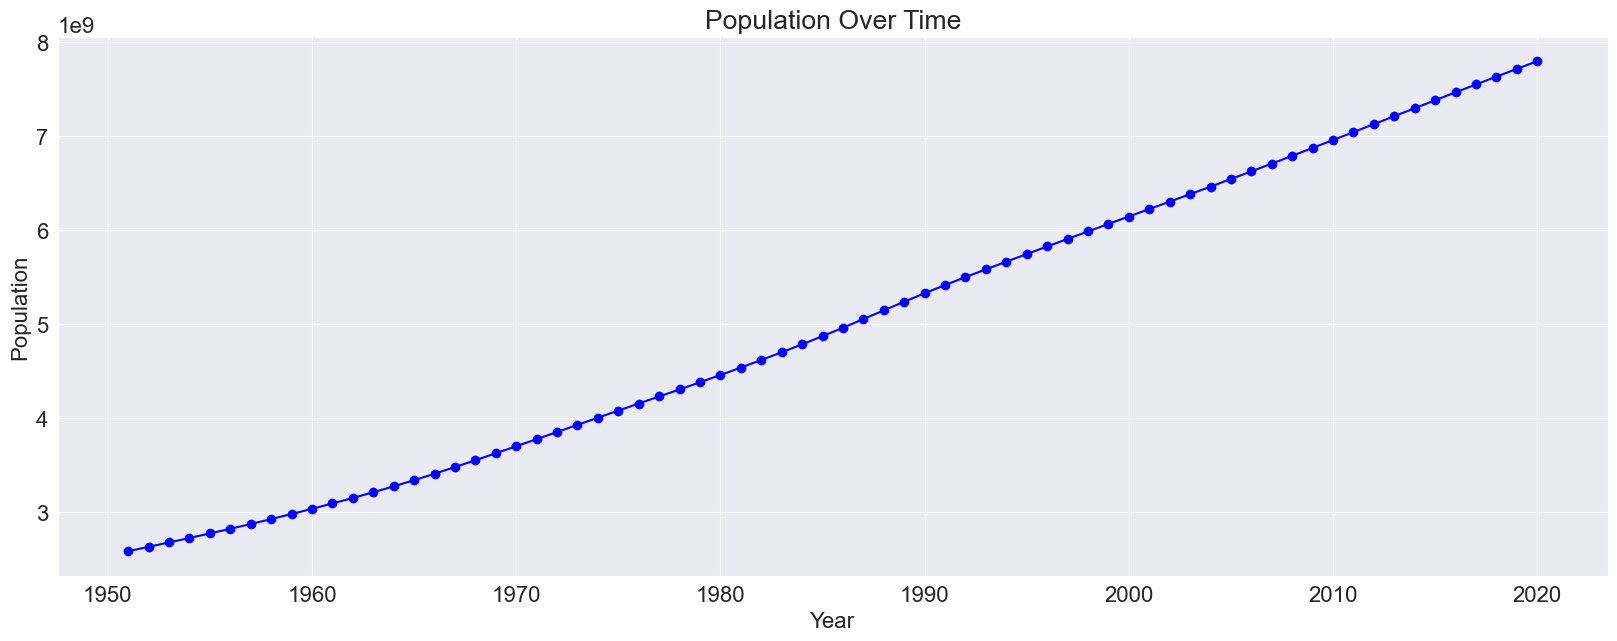

In [107]:
plt.figure(figsize=(20, 7))  # Adjust the figure size if needed

plt.plot(df_cleaned_y['Year'], df_cleaned_y['World Population'], marker='o', linestyle='-', color='blue')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population Over Time')

# Displaying the plot
plt.show()

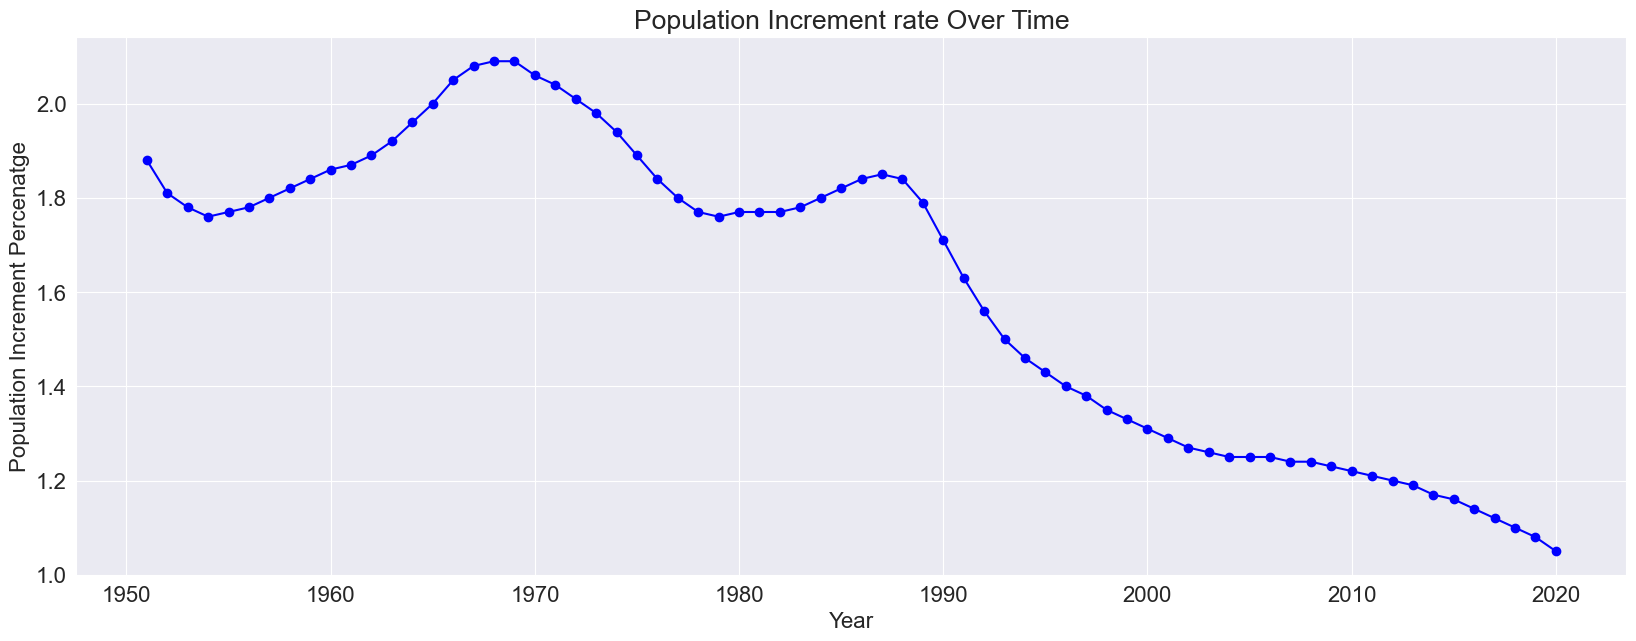

In [106]:
plt.figure(figsize=(20, 7))  # Adjust the figure size if needed

plt.plot(df_cleaned_y['Year'], df_cleaned_y['YearlyChange'], marker='o', linestyle='-', color='blue')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Population Increment Percenatge')
plt.title('Population Increment rate Over Time')

# Displaying the plot
plt.show()

Plotting the bar graph showing 10 year which faced maximum and minimum increment in population

In [108]:
df_cleaned_y['Year']= df_cleaned_y['Year'].astype(str) 

In [88]:
def large_small(var , col1, col2, title):
    if var == 1:
        top10 = df_cleaned_y.nlargest(10,col2)
    if var == 2:
        top10 = df_cleaned_y.nsmallest(10,col2)
    fig, ax = plt.subplots()
    ax.set_xticks(range(10))
    ax.set_xticklabels(top10[col1])
    ax = plt.bar(top10[col1], top10[col2],color=['lightblue','red','blue','green','black','purple','violet','cyan','darkgreen','pink'],alpha=0.5,edgecolor='black')
    fig.set_size_inches(30, 10)
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title(title)
    plt.show()

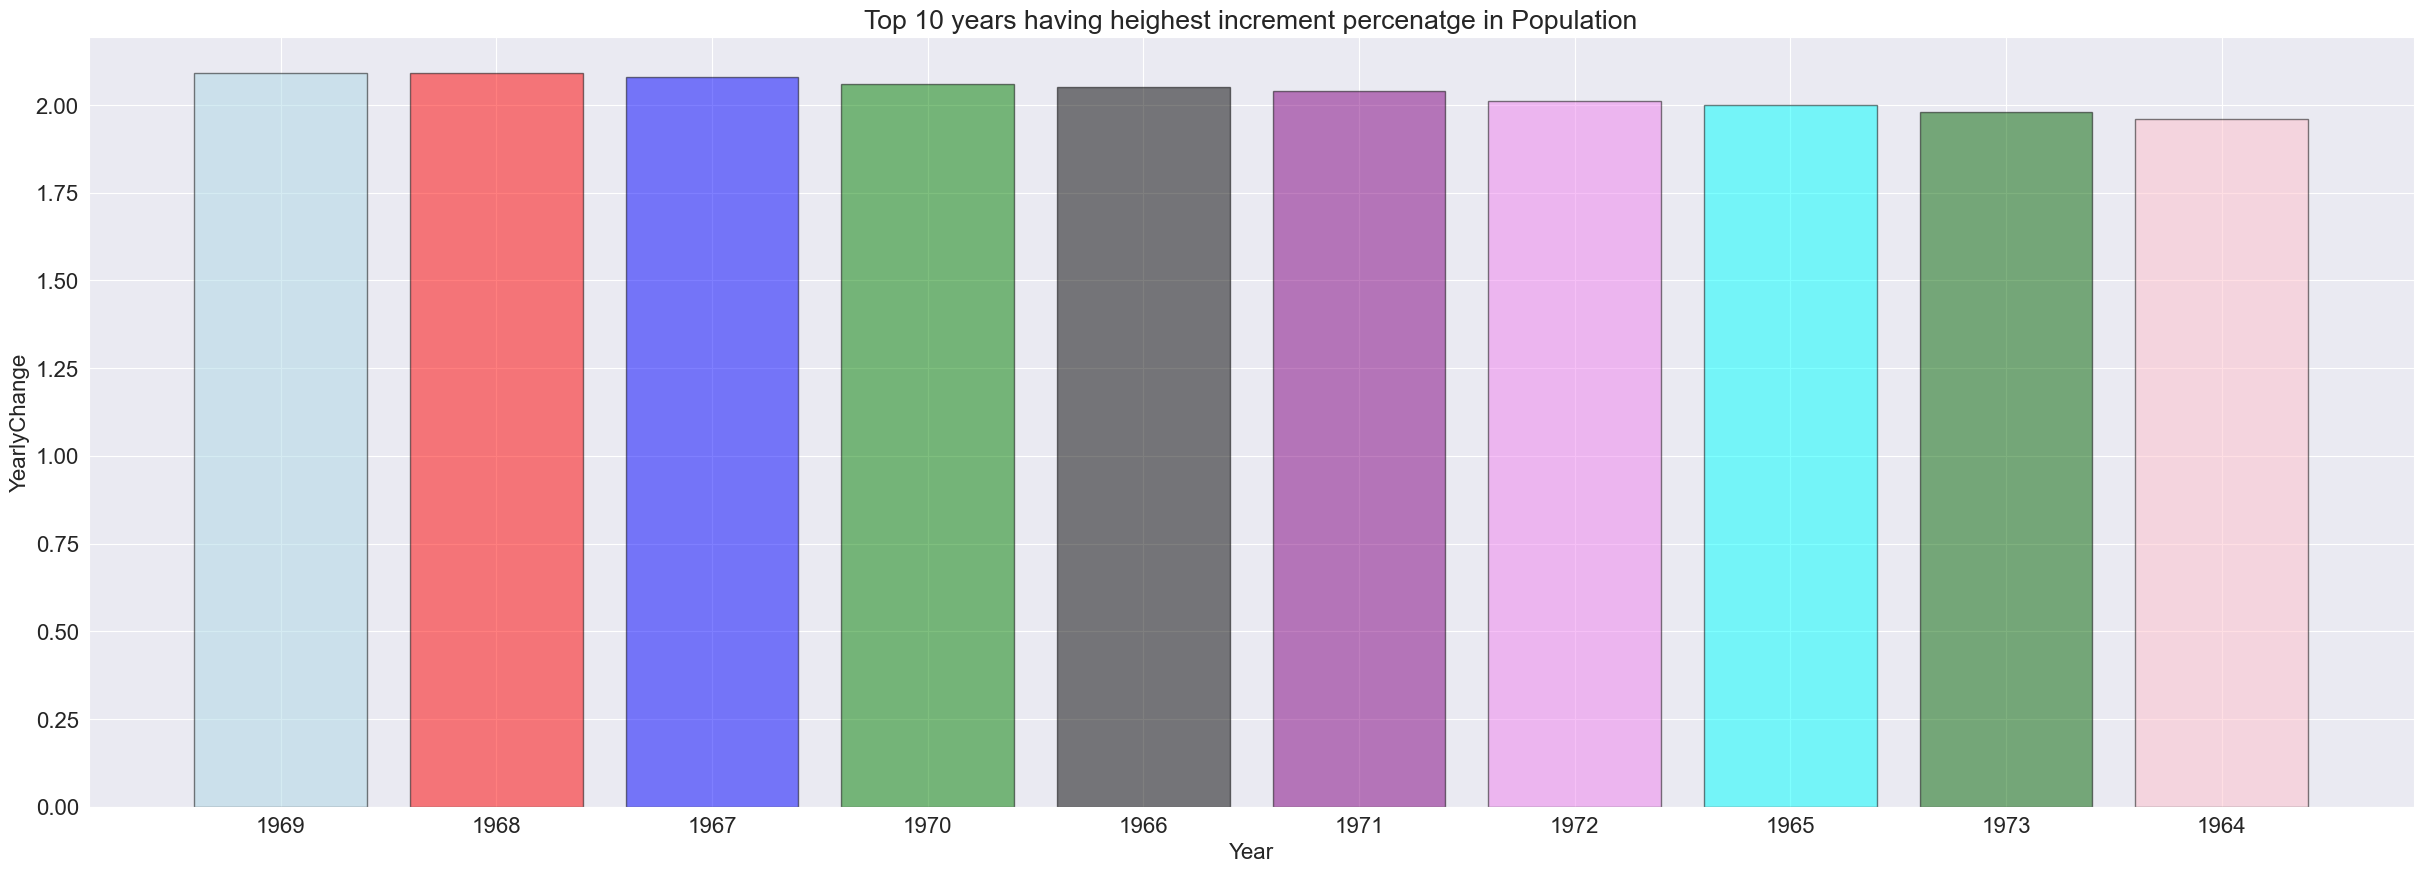

In [91]:
large_small(1,'Year','YearlyChange','Top 10 years having heighest increment percenatge in Population')

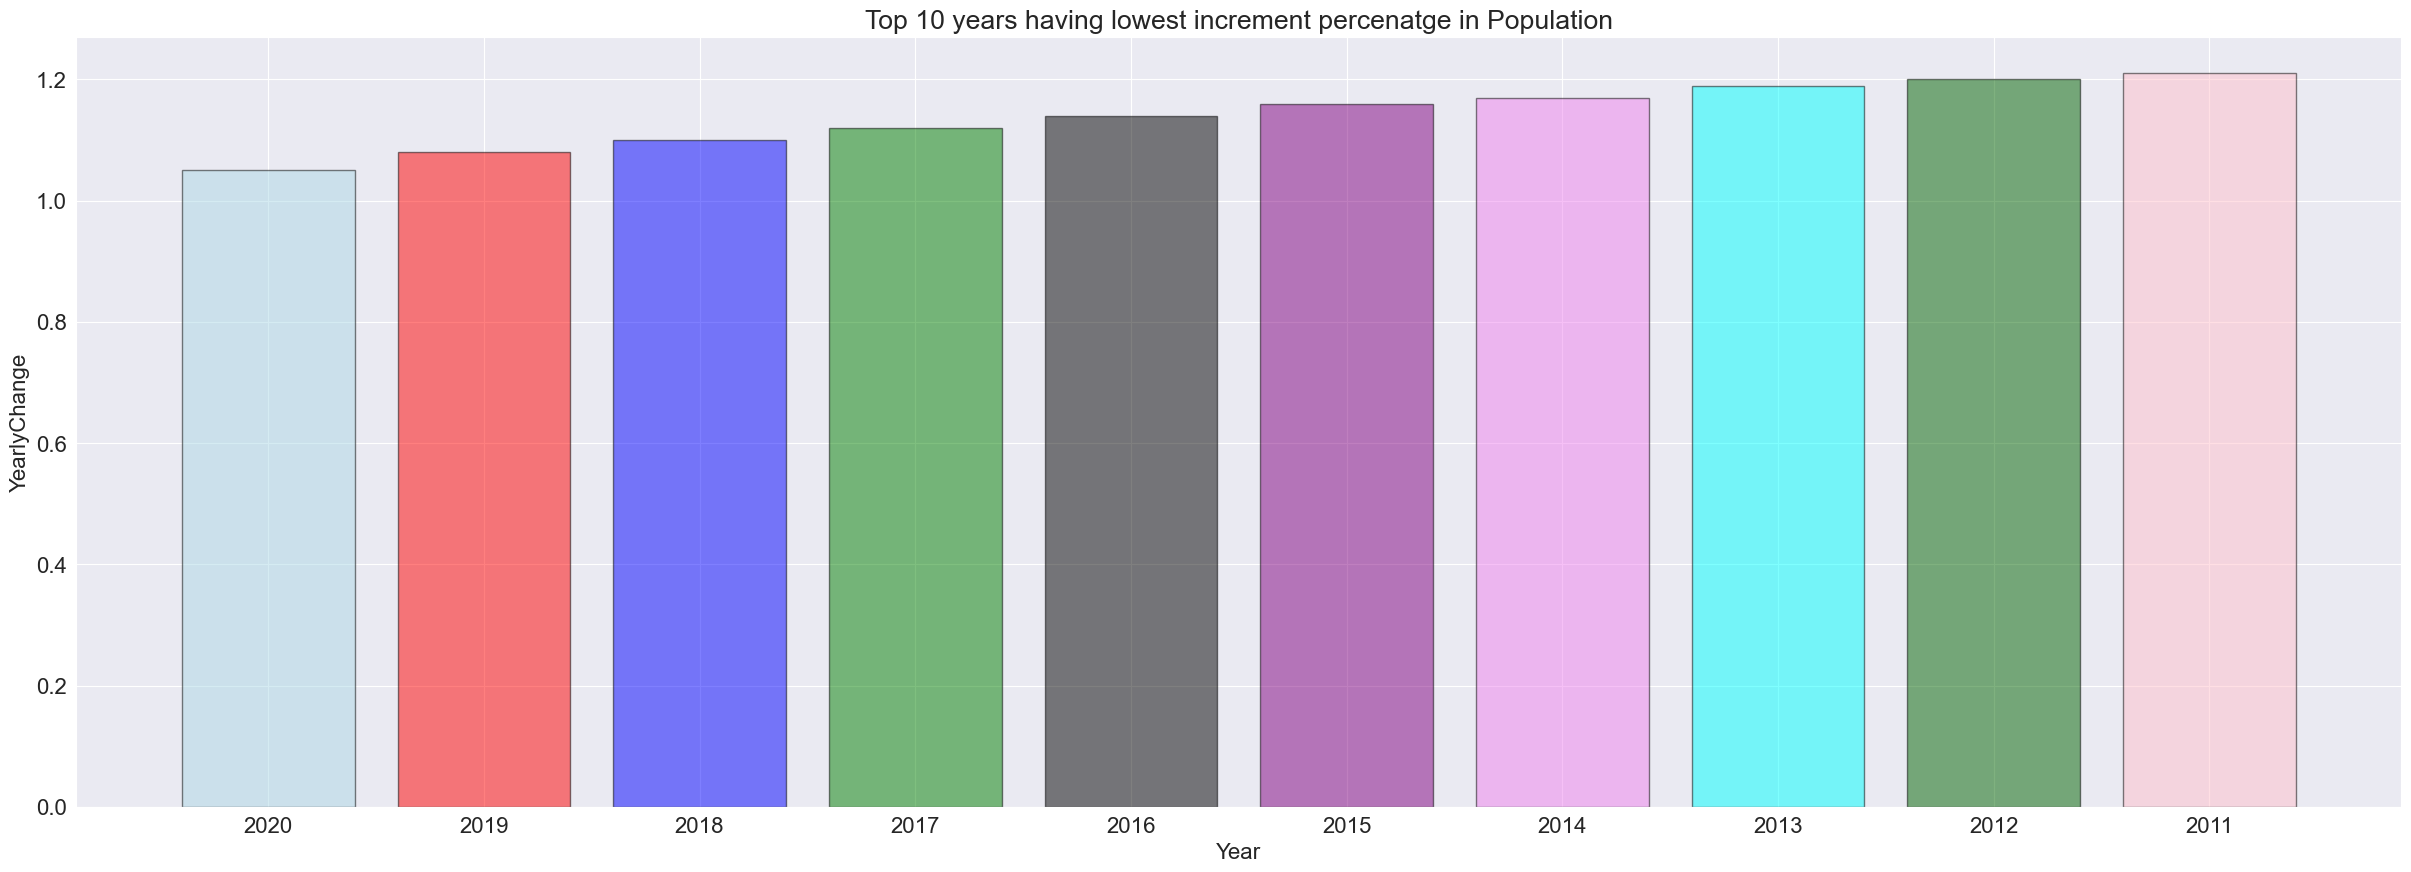

In [92]:
large_small(2,'Year','YearlyChange','Top 10 years having lowest increment percenatge in Population')


Plotting the years in which densities were maximum

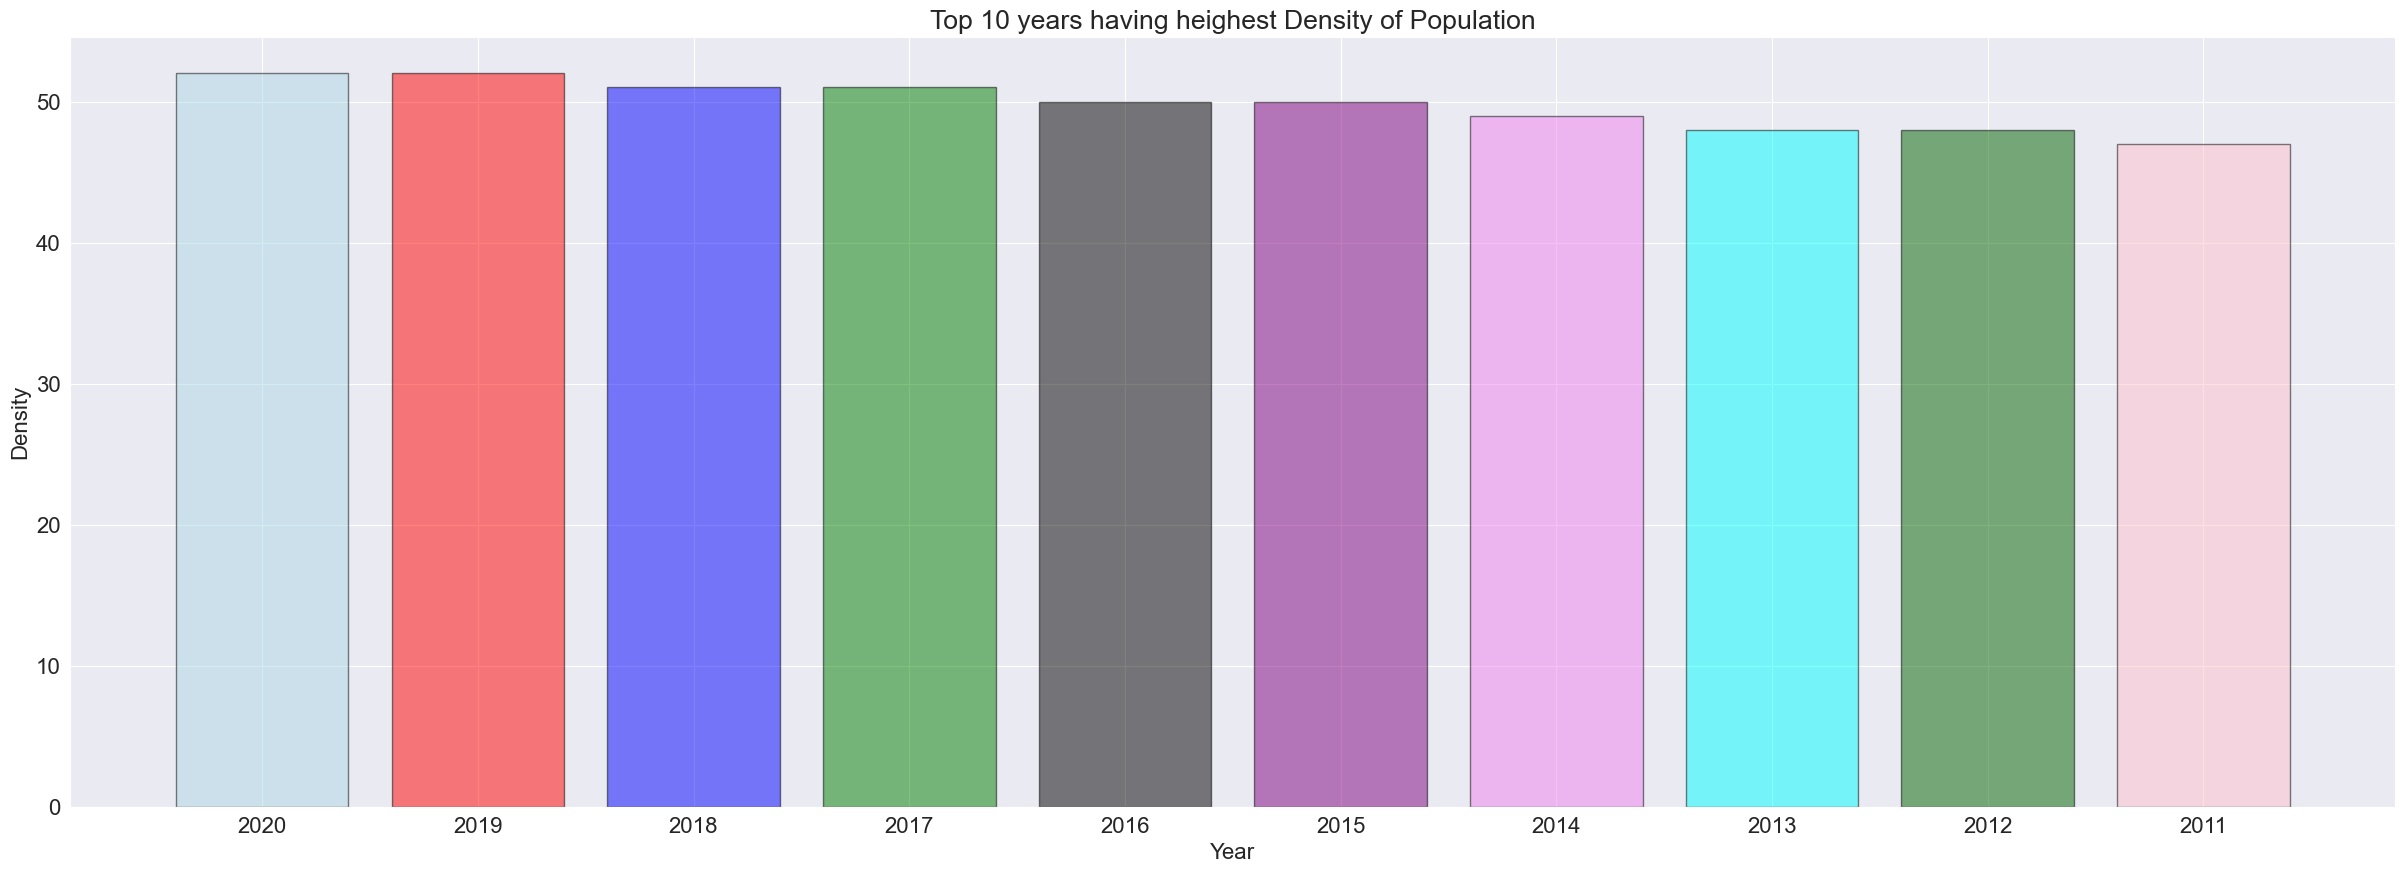

In [111]:
large_small(1,'Year','Density','Top 10 years having heighest Density of Population')

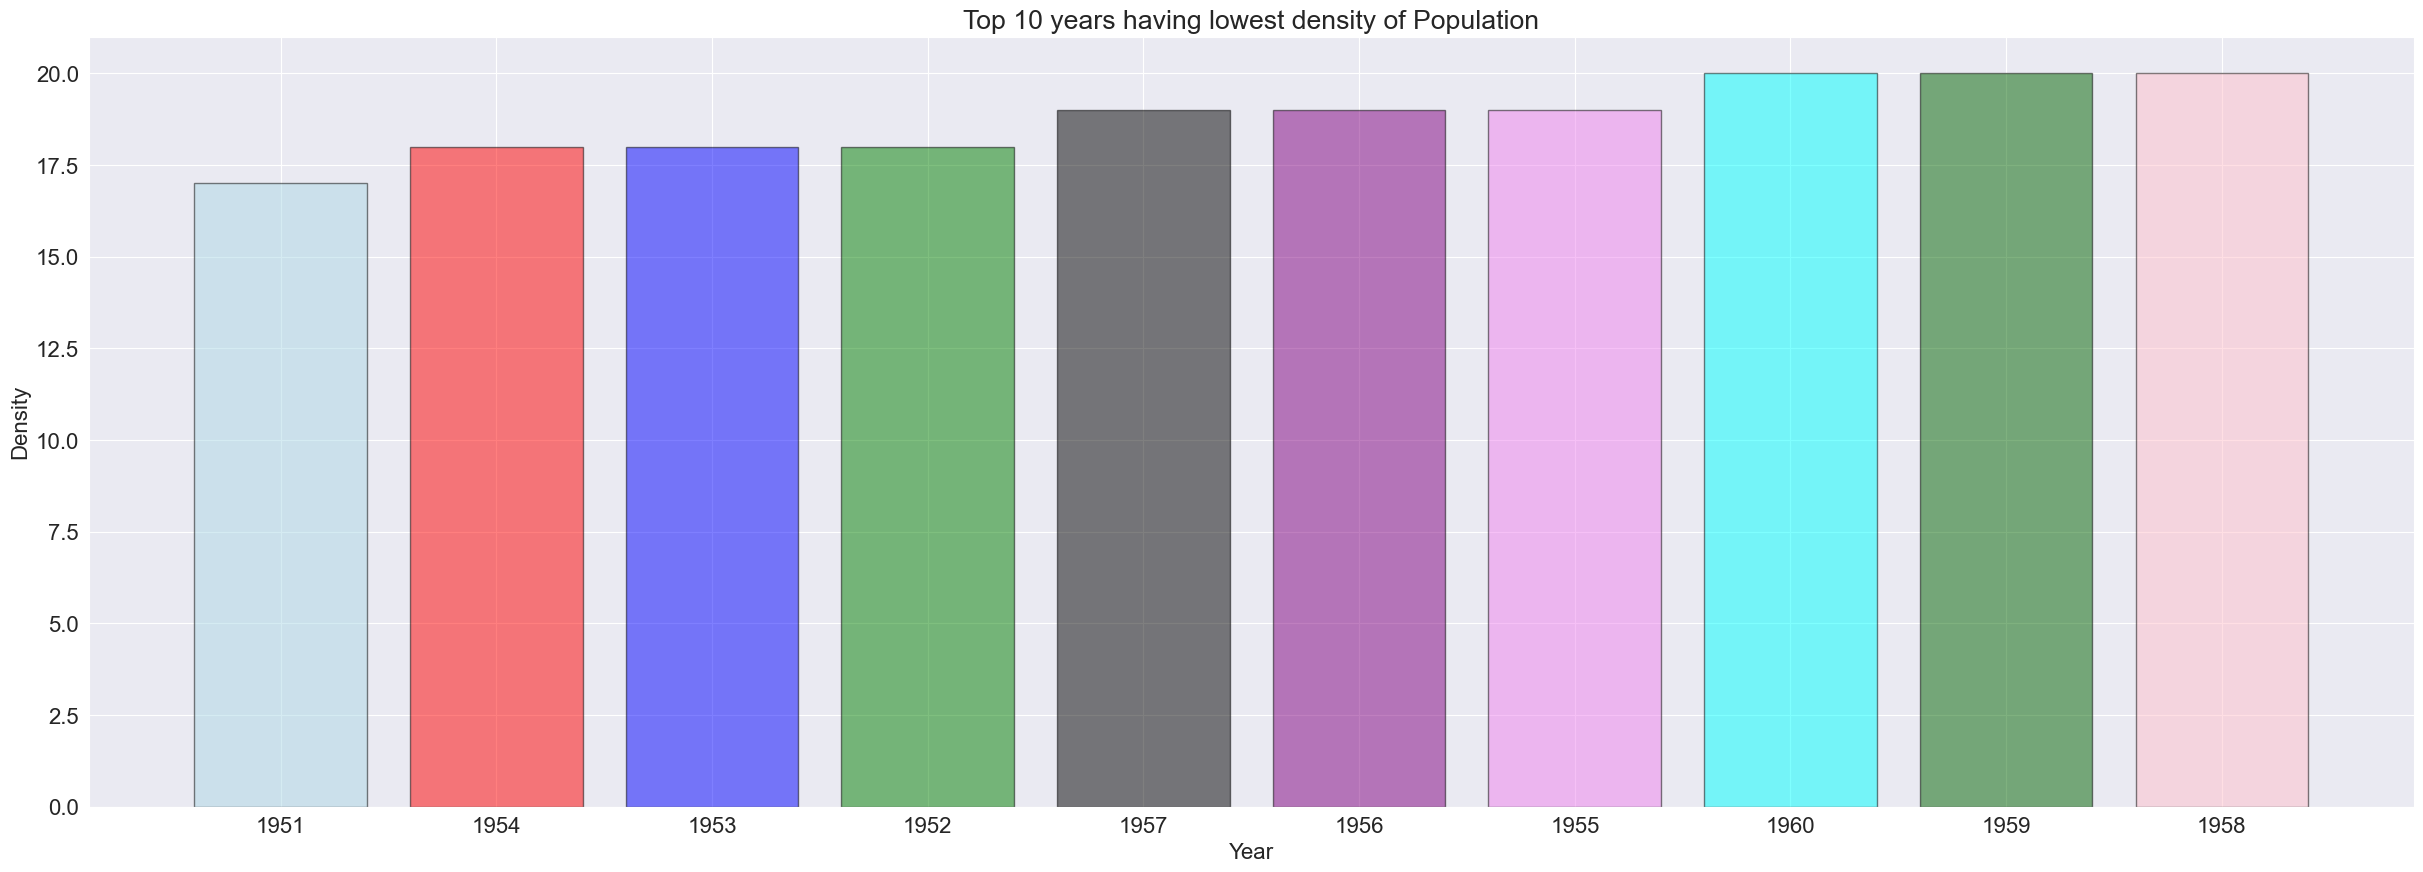

In [112]:
large_small(2,'Year','Density','Top 10 years having lowest density of Population')